<a href="https://colab.research.google.com/github/RNSHDeepika7/Assignments/blob/main/XGBM_%26_LGBM__assgnt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Titanic_train
from google.colab import files
uploaded=files.upload()

Saving Titanic_train.csv to Titanic_train.csv


In [59]:
import pandas as pd
df=pd.read_csv("Titanic_train.csv")
df

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [60]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

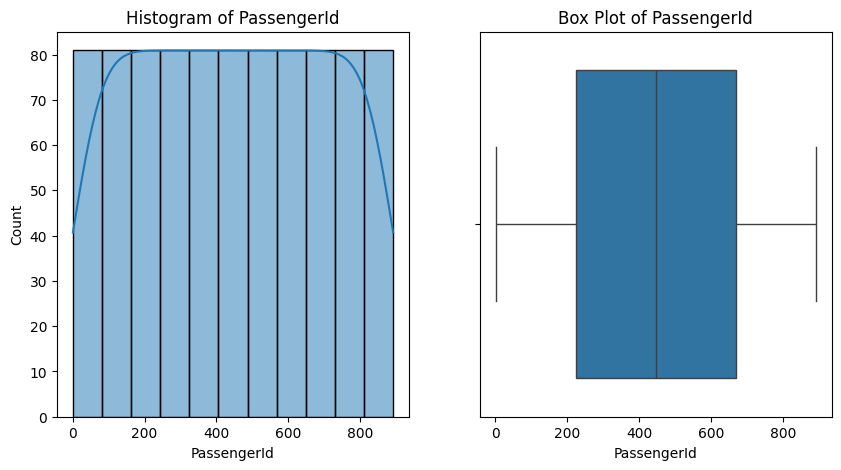

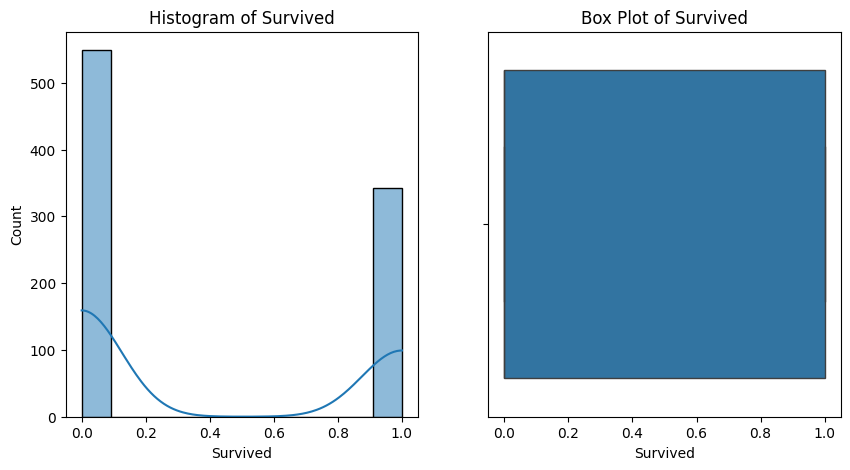

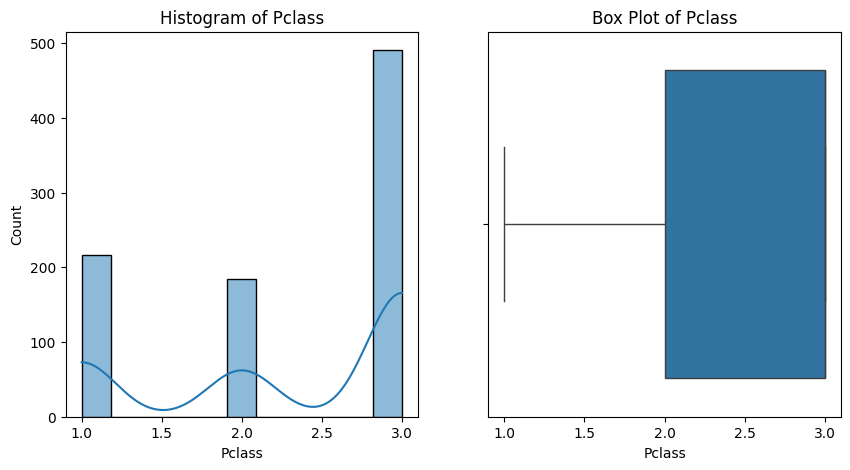

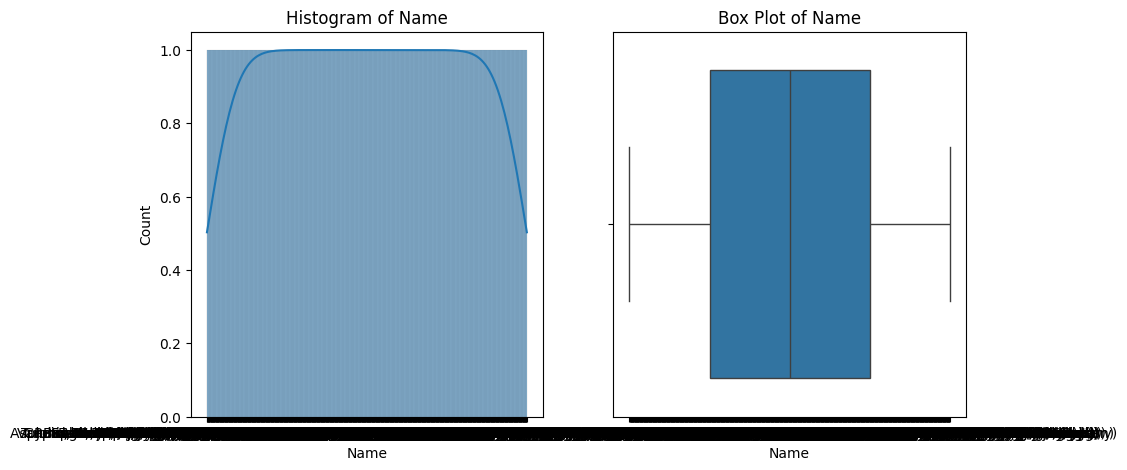

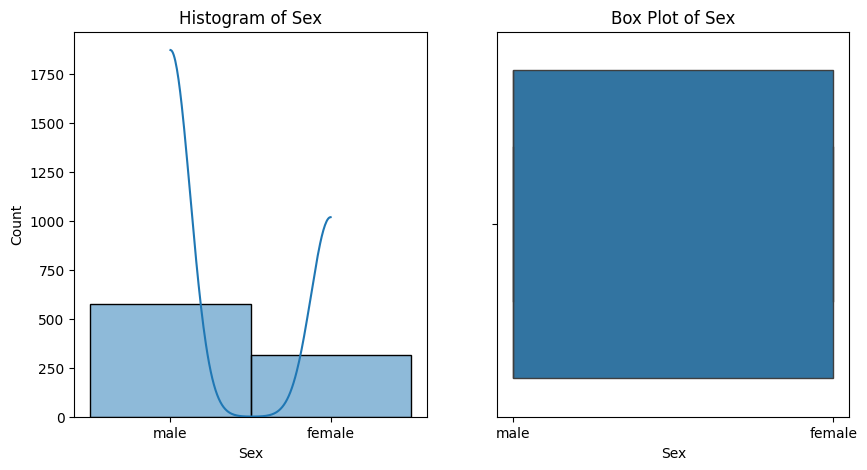

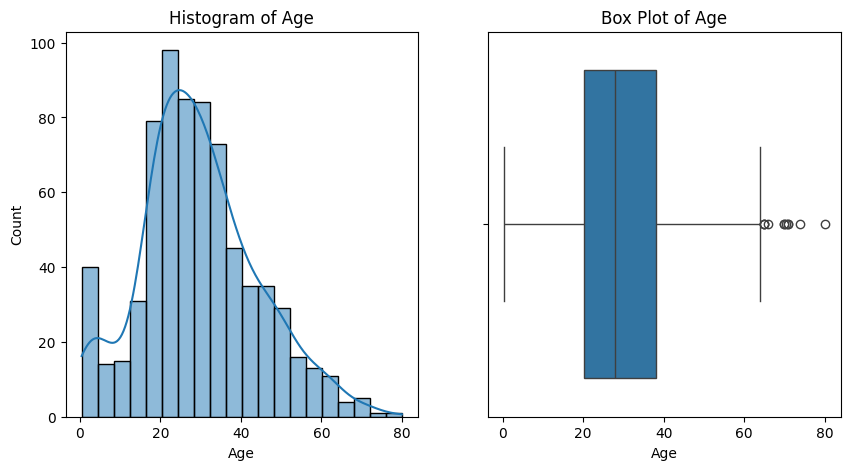

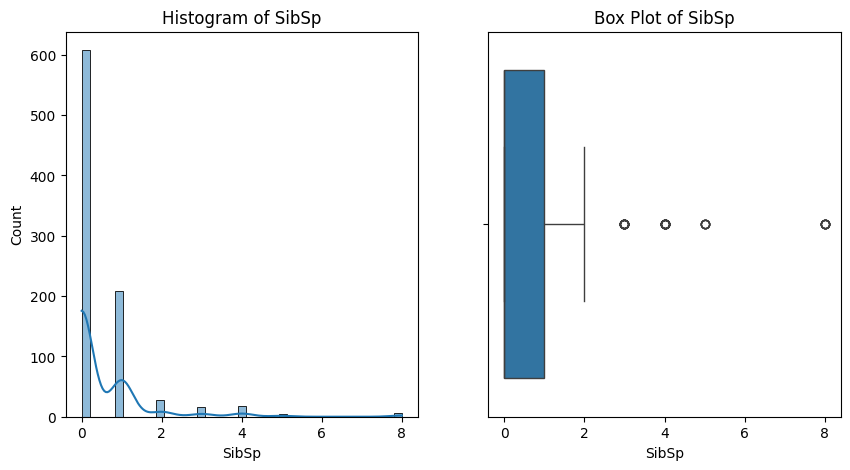

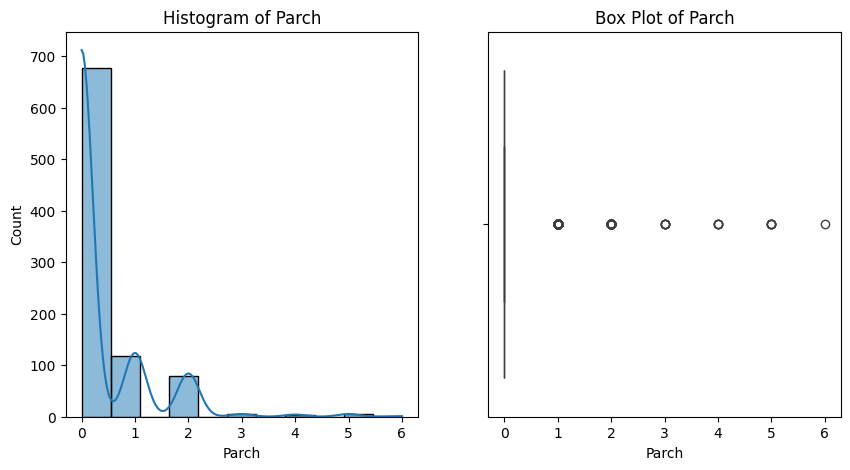

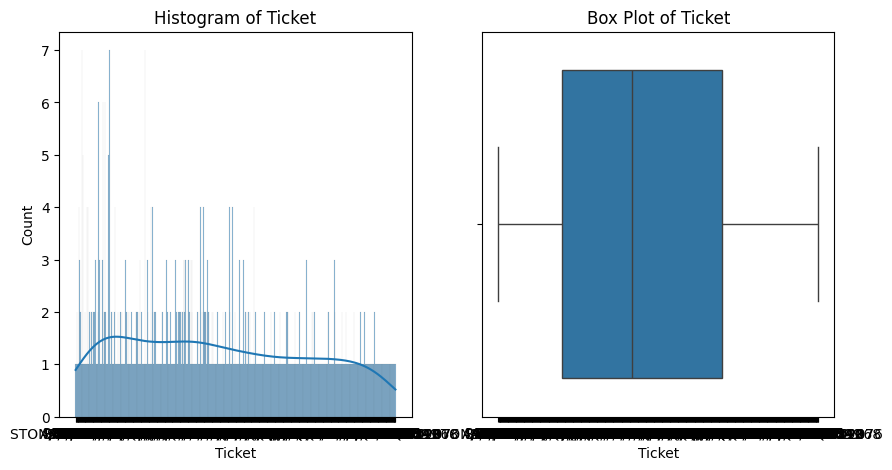

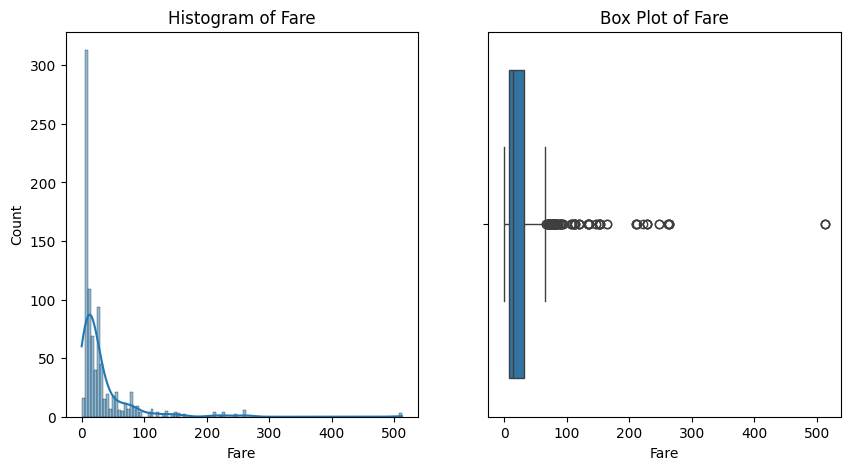

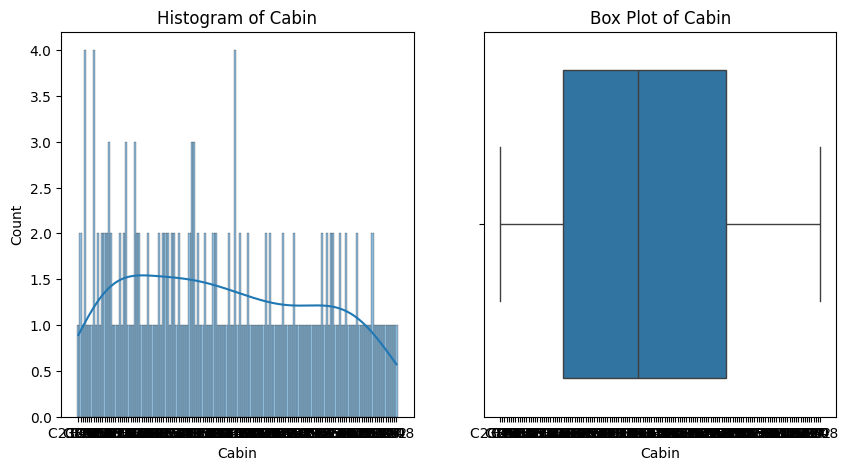

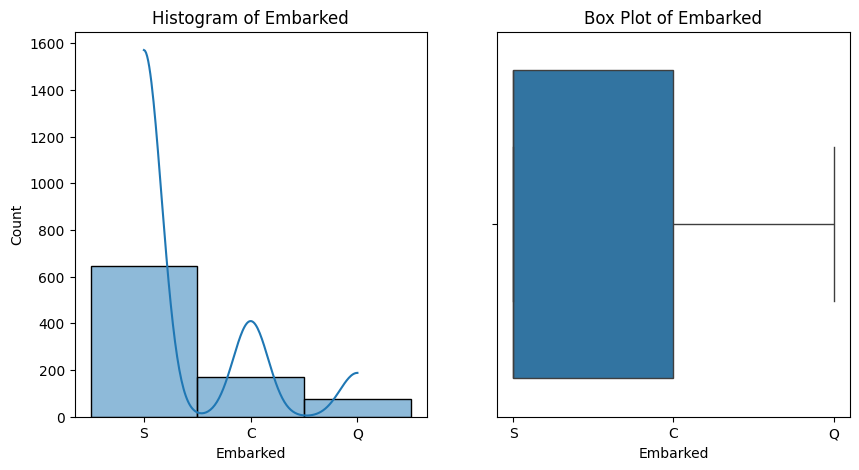

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
  plt.figure(figsize=(10, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Histogram of {column}')

  # Box plot
  plt.subplot(1, 2, 2)
  sns.boxplot(data=df, x=column)
  plt.title(f'Box Plot of {column}')

  plt.show()


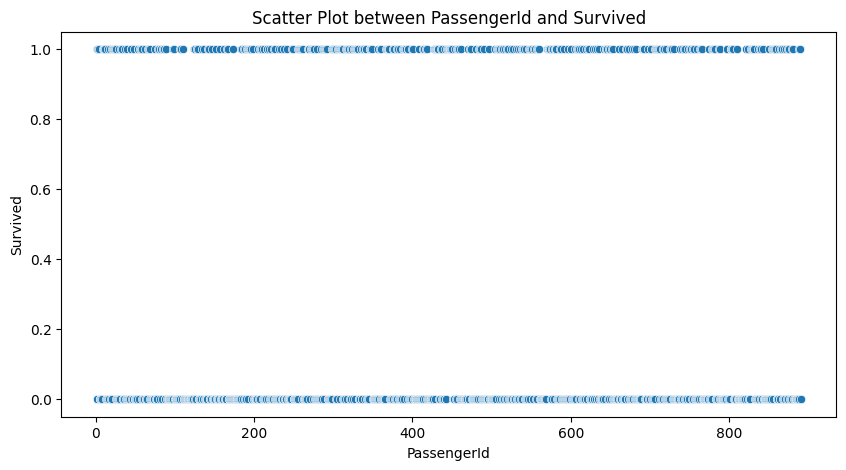

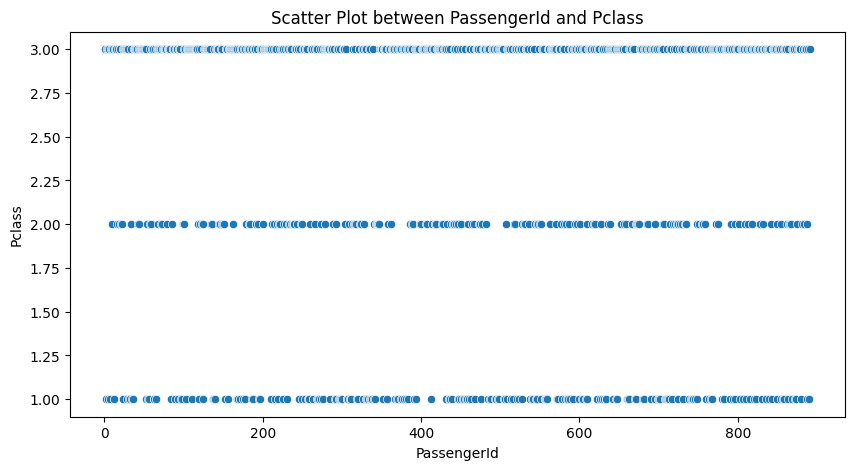

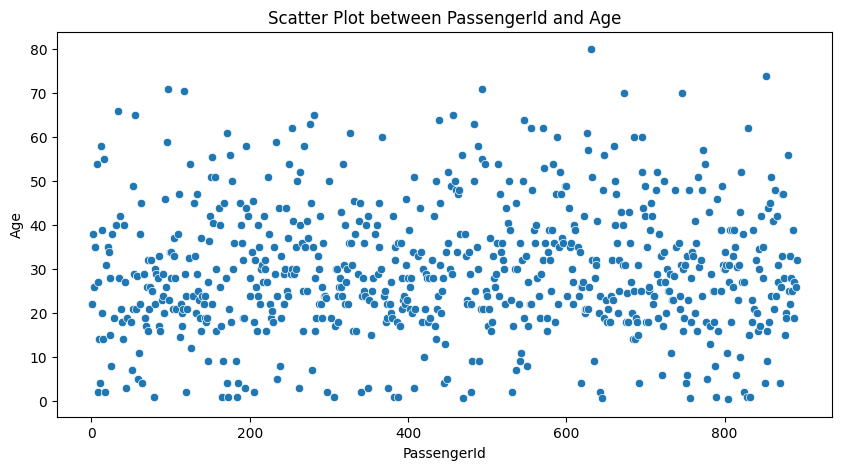

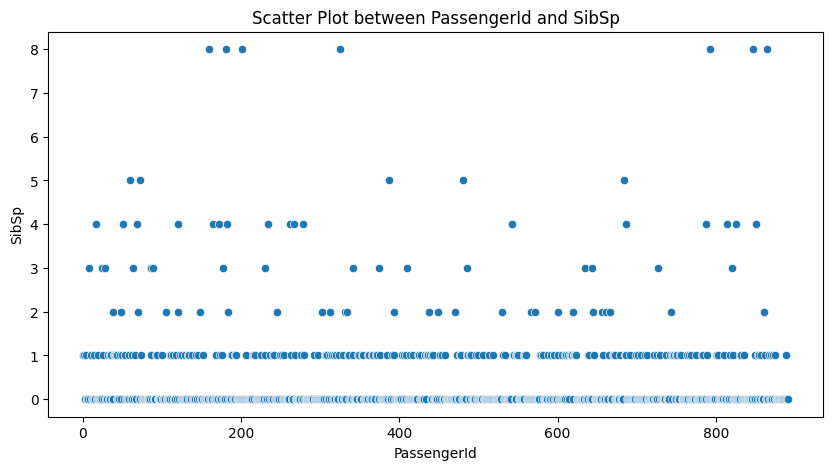

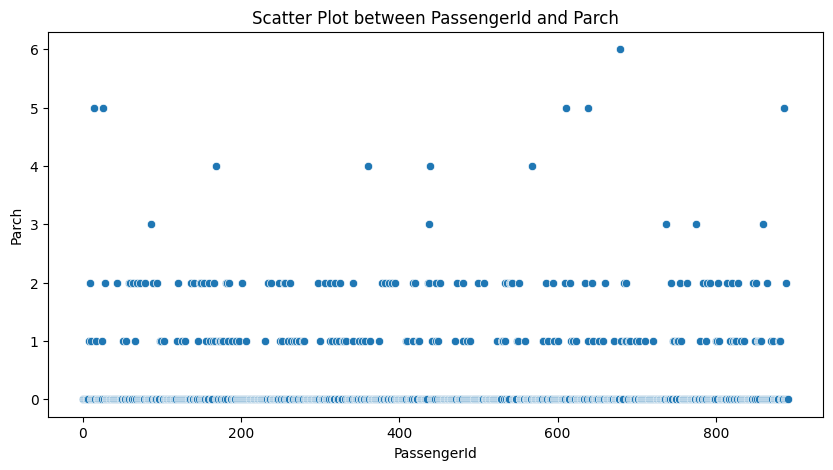

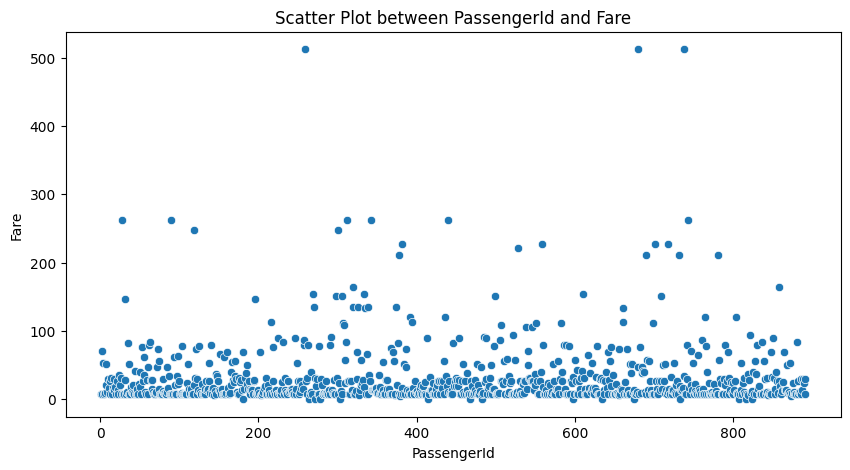

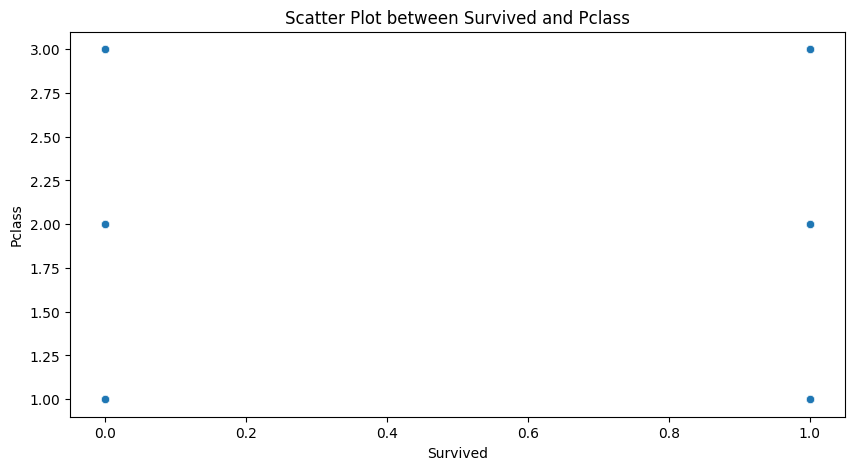

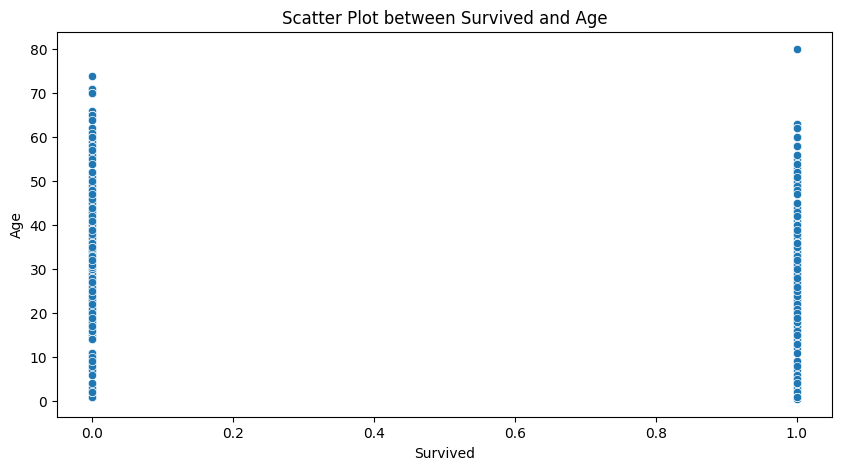

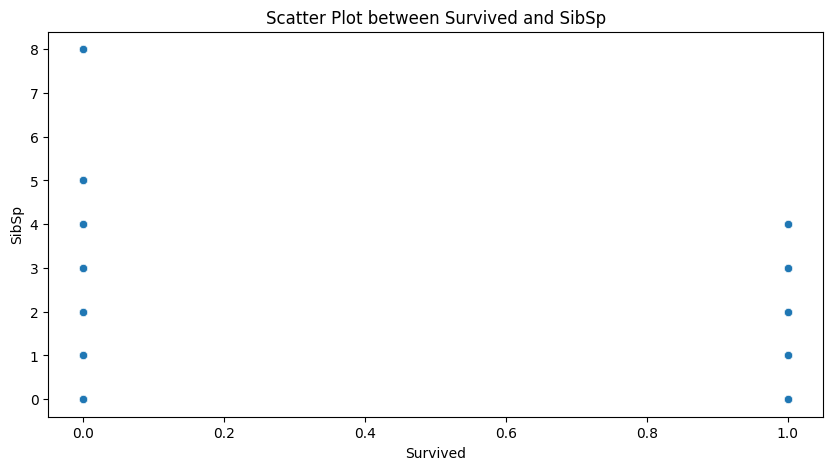

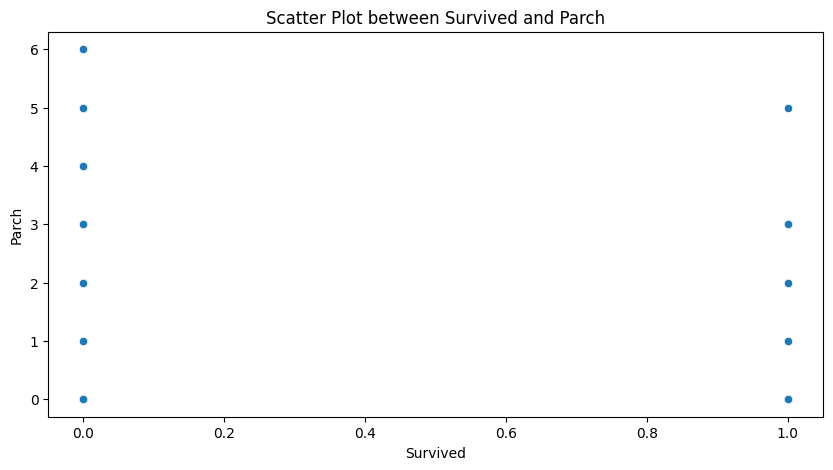

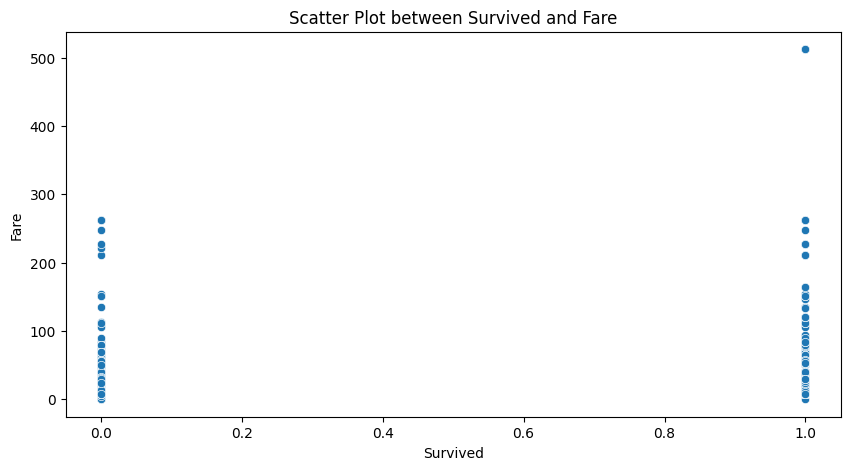

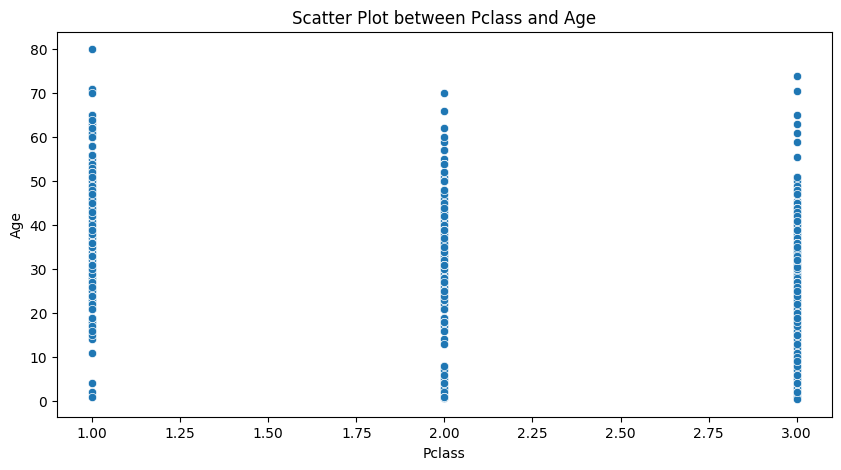

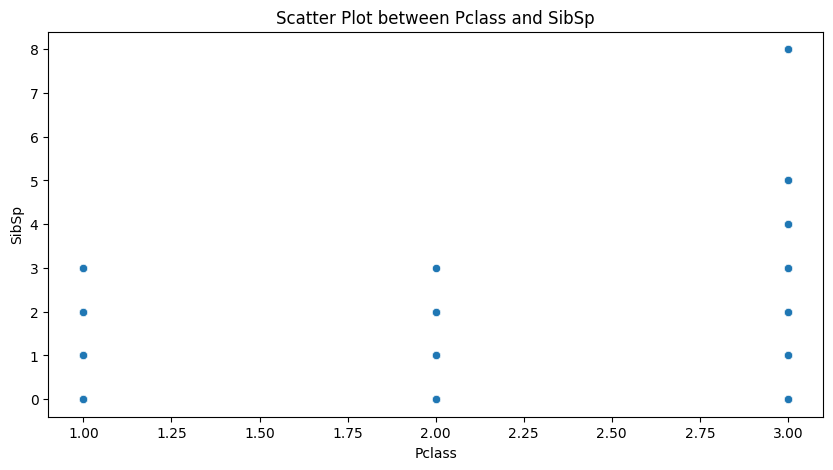

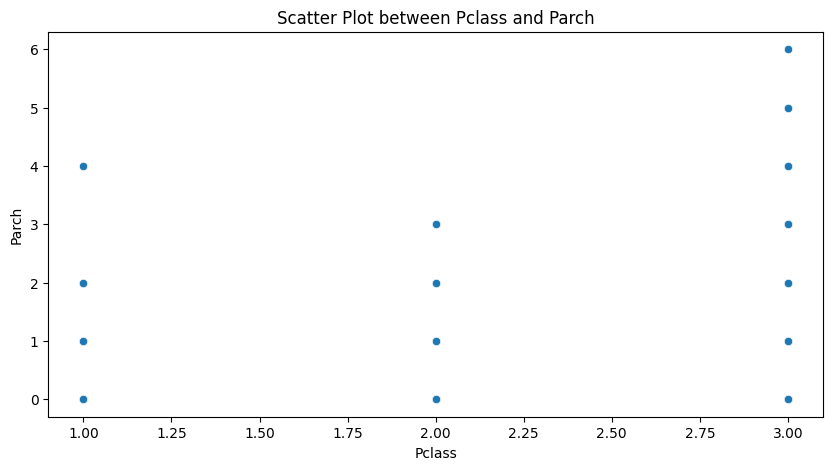

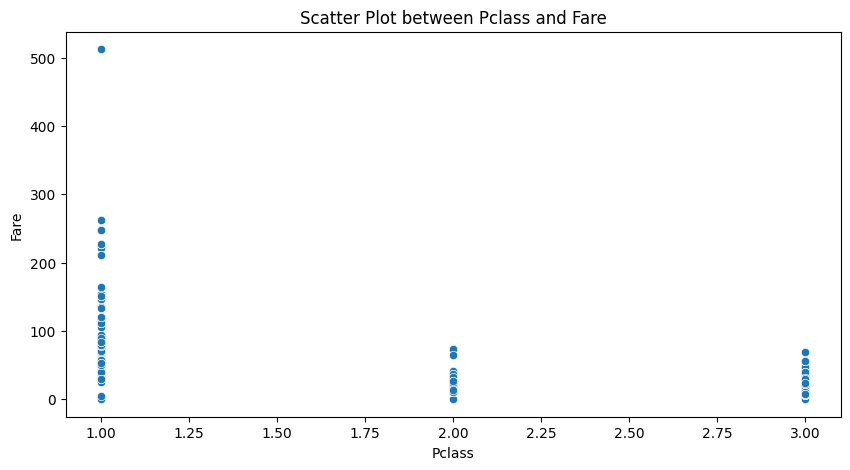

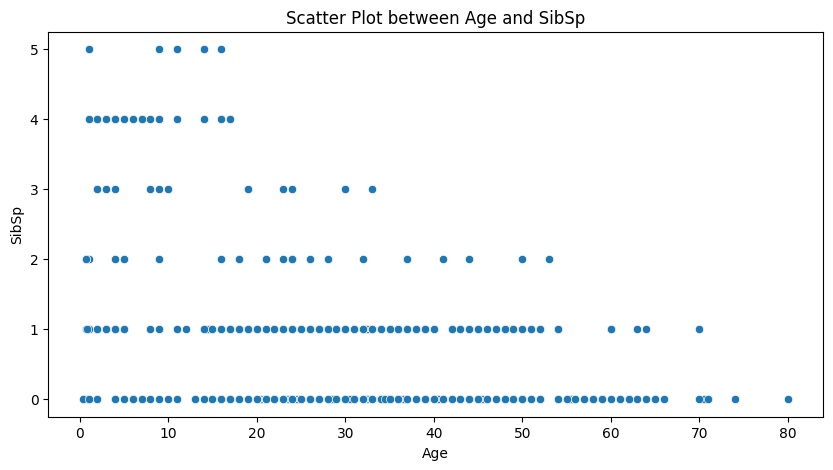

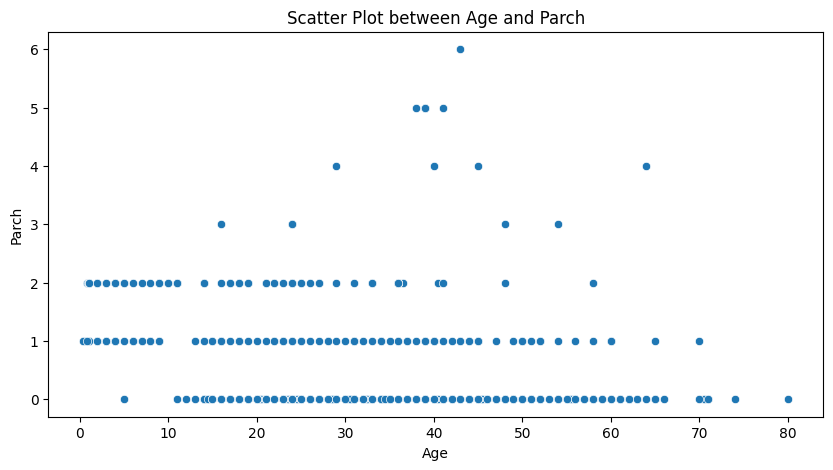

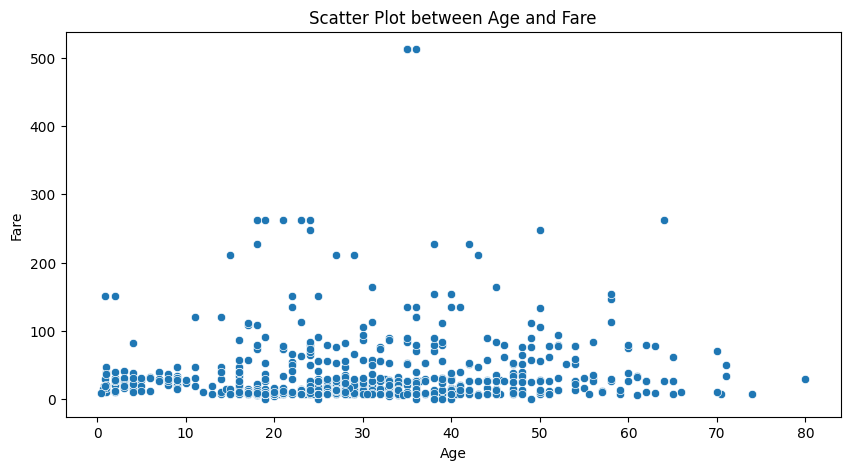

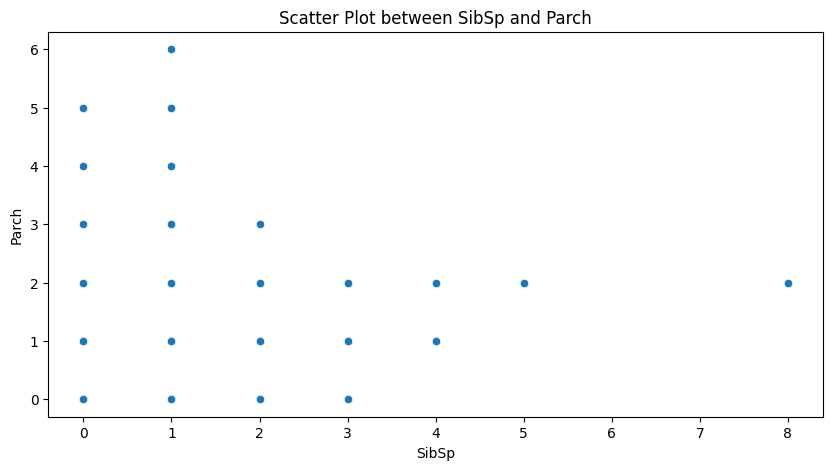

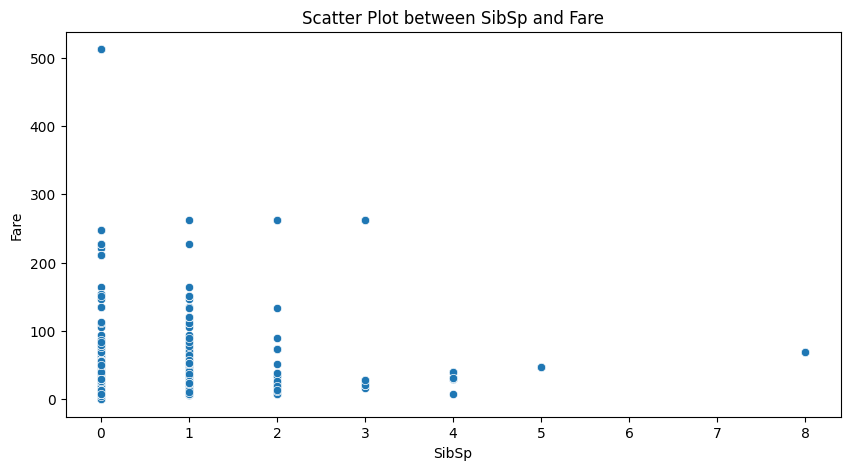

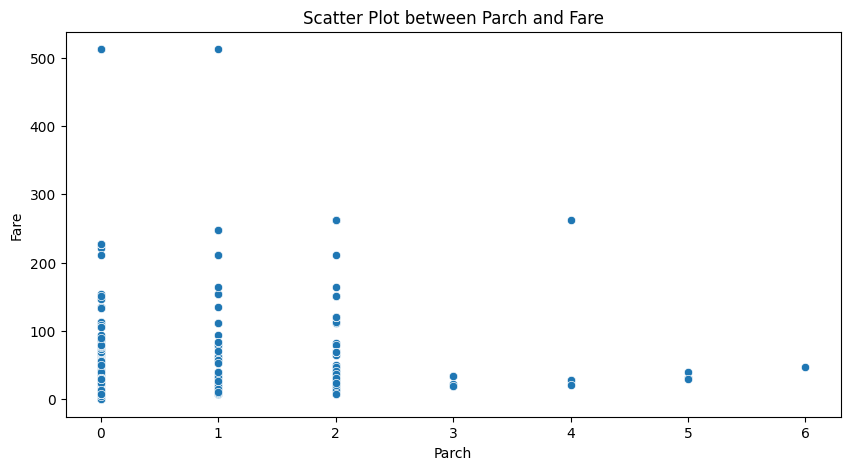

In [62]:
import matplotlib.pyplot as plt
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for i in range(len(numerical_columns)):
  for j in range(i + 1, len(numerical_columns)):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=numerical_columns[i], y=numerical_columns[j])
    plt.title(f'Scatter Plot between {numerical_columns[i]} and {numerical_columns[j]}')
    plt.show()


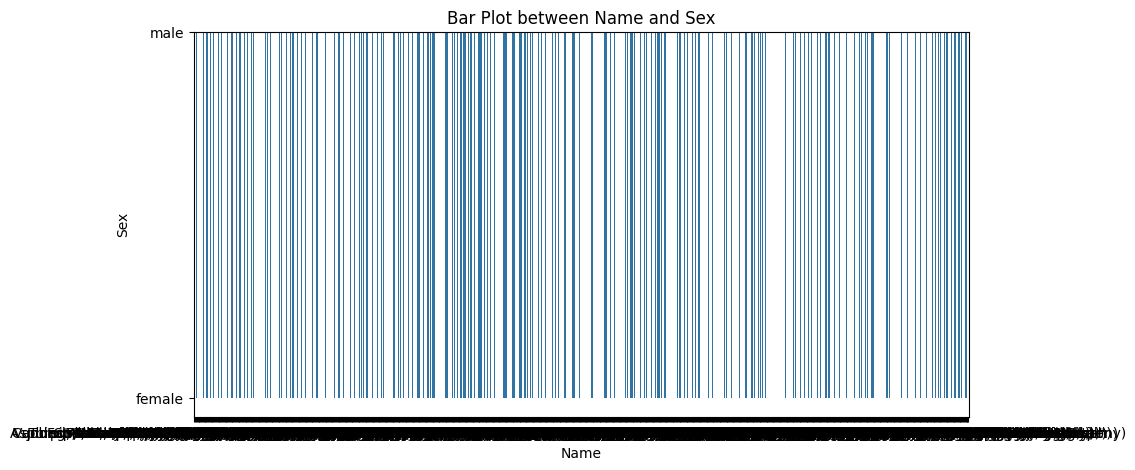

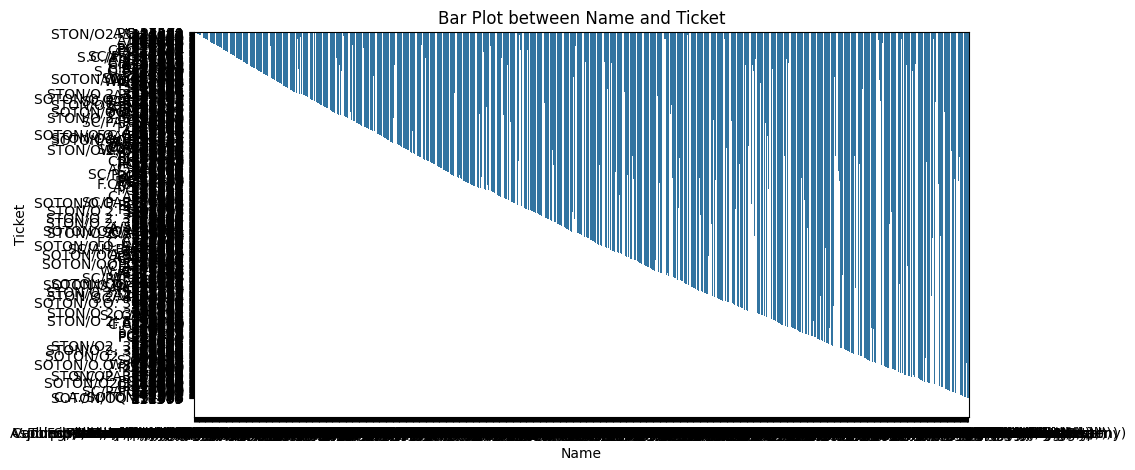

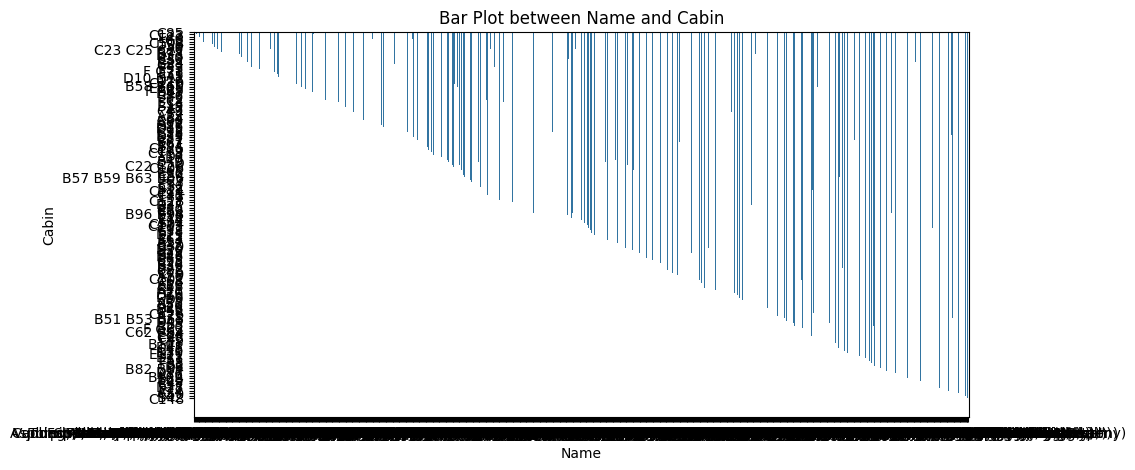

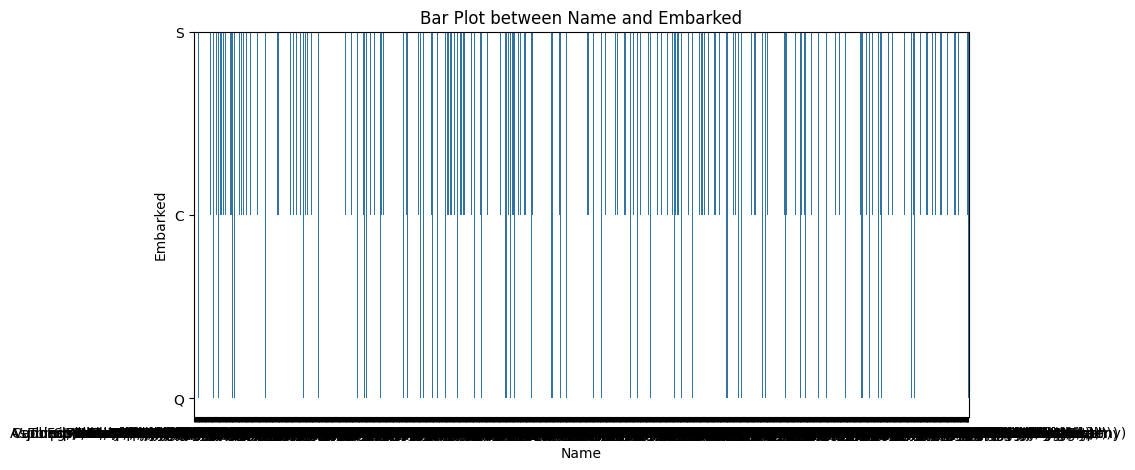

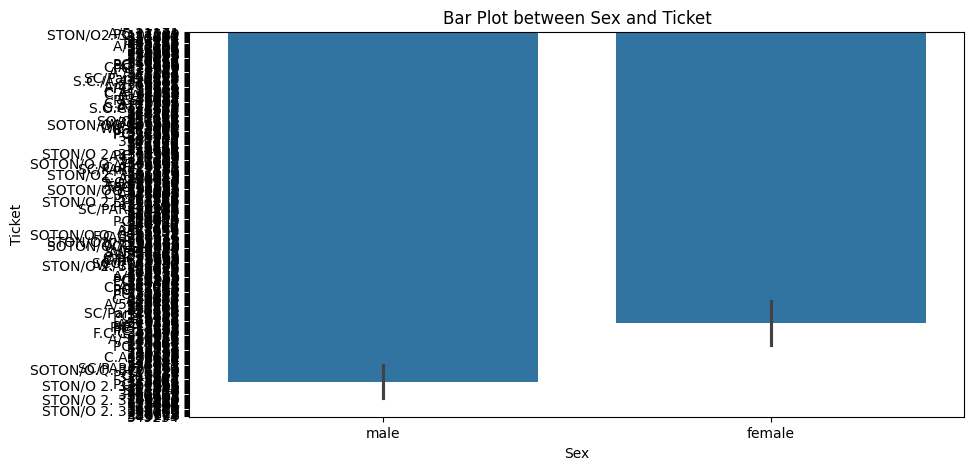

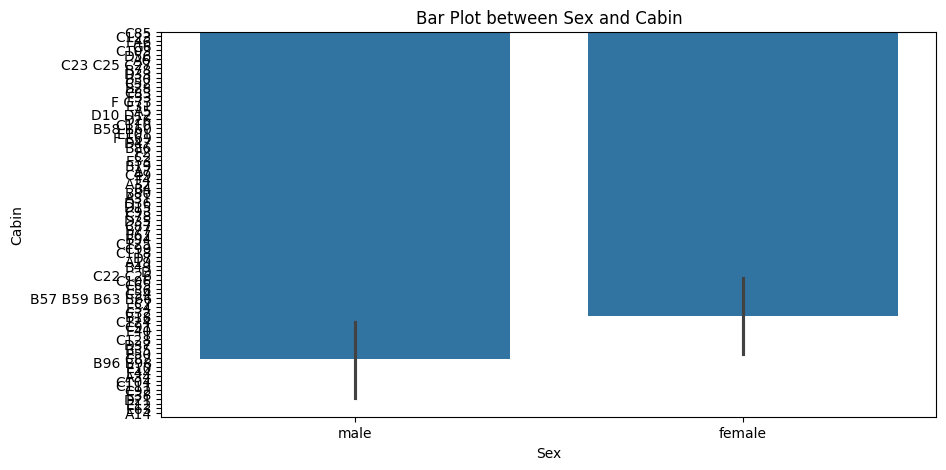

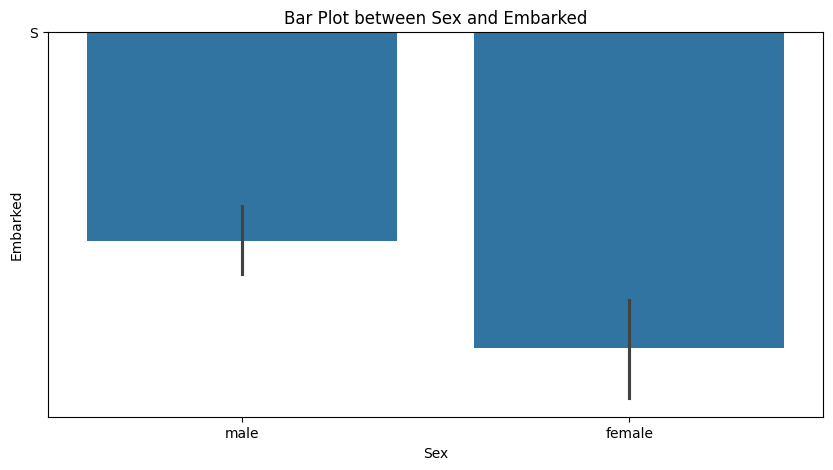

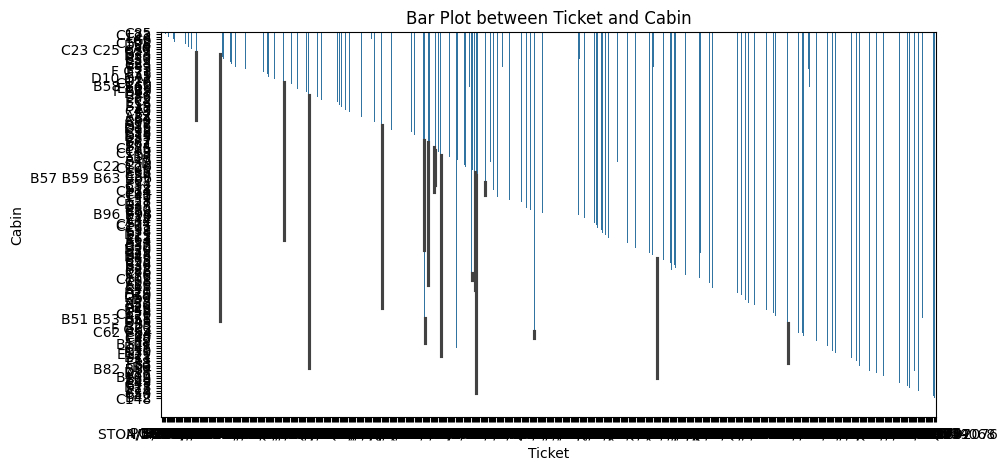

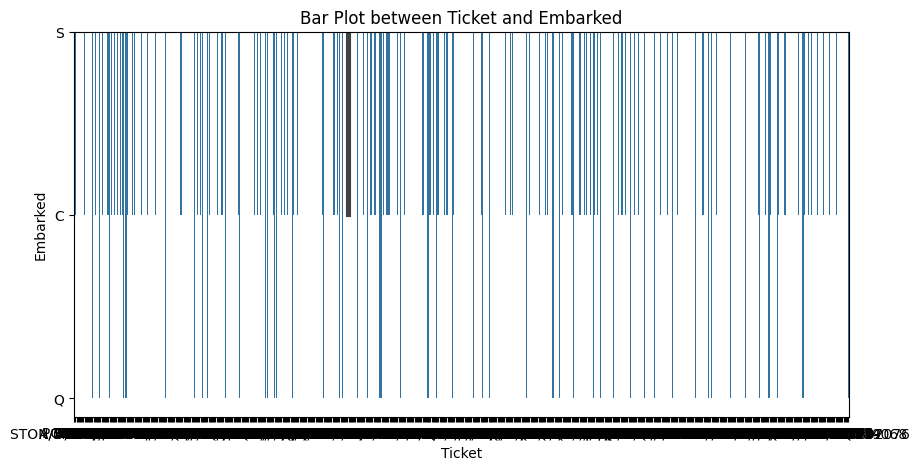

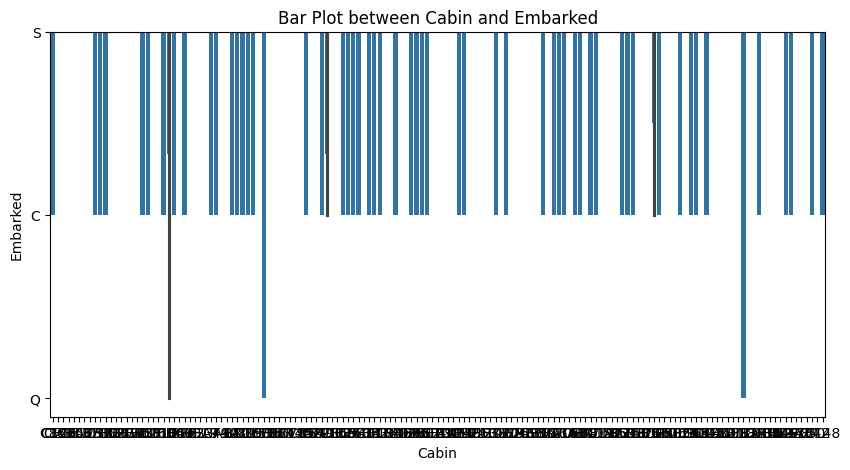

In [63]:
import matplotlib.pyplot as plt
categorical_columns = df.select_dtypes(include=['object']).columns

for i in range(len(categorical_columns)):
  for j in range(i + 1, len(categorical_columns)):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=categorical_columns[i], y=categorical_columns[j])
    plt.title(f'Bar Plot between {categorical_columns[i]} and {categorical_columns[j]}')
    plt.show()


In [64]:
# handling the missing values

# Fill missing values in numerical columns with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill missing values in categorical columns with the mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])


In [65]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the categorical columns
for column in categorical_columns:
  # Fit the encoder to the data
  le.fit(df[column])

  # Transform the data
  df[column] = le.transform(df[column])
df.head()

PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500     47         2  
1  71.2833     81         0  
2   7.9250     47         2  
3  53.1000     55         2  
4   8.0500     47         2

In [66]:
df.shape

(891, 12)

In [67]:
Y=df["Embarked"]
X=df.iloc[:,0:11]
X.head()

PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  
0   7.2500     47  
1  71.2833     81  
2   7.9250     47  
3  53.1000     55  
4   8.0500     47

In [68]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X=SS.fit_transform(X)
SS_X=pd.DataFrame(SS_X)
SS_X.columns=list(X)
SS_X.head()

PassengerId  Survived    Pclass      Name       Sex       Age     SibSp  \
0    -1.730108 -0.789272  0.827377 -1.310217  0.737695 -0.565736  0.432793   
1    -1.726220  1.266990 -1.566107 -0.991410 -1.355574  0.663861  0.432793   
2    -1.722332  1.266990  0.827377 -0.357685 -1.355574 -0.258337 -0.474545   
3    -1.718444  1.266990 -1.566107 -0.672604 -1.355574  0.433312  0.432793   
4    -1.714556 -0.789272  0.827377 -1.671790  0.737695  0.433312 -0.474545   

      Parch    Ticket      Fare     Cabin  
0 -0.473674  0.918966 -0.502445 -0.281881  
1 -0.473674  1.282625  0.786845  1.161545  
2 -0.473674  1.646283 -0.488854 -0.281881  
3 -0.473674 -1.442322  0.420730  0.057748  
4 -0.473674  0.664904 -0.486337 -0.281881

In [69]:
#dividing the data into training and testing samples
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30)

In [70]:
#LGBM
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# Create a LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, max_features=0.7)

# Fit the model to the training data
lgb_clf.fit(X_train, Y_train)

# Predict the labels for the training data
Y_pred_train = lgb_clf.predict(X_train)

# Calculate the accuracy for the training data
accuracy_train = accuracy_score(Y_train, Y_pred_train)

# Predict the labels for the test data
Y_pred_test = lgb_clf.predict(X_test)

# Calculate the accuracy for the test data
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# Print the training and test accuracy
print(f"Training accuracy: {accuracy_train}")
print(f"Test accuracy: {accuracy_test}")

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 863
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 11
[LightGBM] [Info] Start training from score -1.655423
[LightGBM] [Info] Start training from score -2.427213
[LightGBM] [Info] Start training from score -0.327524
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [79]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Create a LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, max_features=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    lgb_clf.fit(X_train,Y_train)
    Y_pred_train=lgb_clf.predict(X_train)
    Y_pred_test=lgb_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(2))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(2))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Info] Number of data points in the train set: 623, number of used features: 11
[LightGBM] [Info] Start training from score -1.734066
[LightGBM] [Info] Start training from score -2.464255
[LightGBM] [Info] Start training from score -0.303320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

In [80]:
import pandas as pd
import numpy as np
table = pd.DataFrame({
    'Model': ['LGBMClassifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
})
table

Model  Training Accuracy  Test Accuracy
0  LGBMClassifier                1.0          0.904

In [81]:
#XGBM
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Create a XGB classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100,colsample_bytree=0.7)

# Fit the model to the training data
xgb_clf.fit(X_train, Y_train)

# Predict the labels for the training data
Y_pred_train = xgb_clf.predict(X_train)

# Calculate the accuracy for the training data
accuracy_train = accuracy_score(Y_train, Y_pred_train)

# Predict the labels for the test data
Y_pred_test = xgb_clf.predict(X_test)

# Calculate the accuracy for the test data
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# Print the training and test accuracy
print(f"Training accuracy: {accuracy_train}")
print(f"Test accuracy: {accuracy_test}")

Training accuracy: 1.0
Test accuracy: 0.8992537313432836


In [82]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_clg = xgb.XGBClassifier(n_estimators=100,colsample_bytree=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    xgb_clg.fit(X_train,Y_train)
    Y_pred_train=xgb_clg.predict(X_train)
    Y_pred_test=xgb_clg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(2))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(2))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.9


In [83]:
import pandas as pd
import numpy as np
table1 = pd.DataFrame({
    'Model': ['XGBClassifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(3)],
    'Test Accuracy': [np.mean(test_accuracy).round(3)]
})
table = pd.concat([table, table1])
table


Model  Training Accuracy  Test Accuracy
0  LGBMClassifier                1.0          0.904
0   XGBClassifier                1.0          0.901

In [30]:
#Titanic_test
from google.colab import files
uploaded=files.upload()

Saving Titanic_test.csv to Titanic_test.csv


In [31]:
import pandas as pd
df=pd.read_csv("Titanic_test.csv")
df

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [32]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

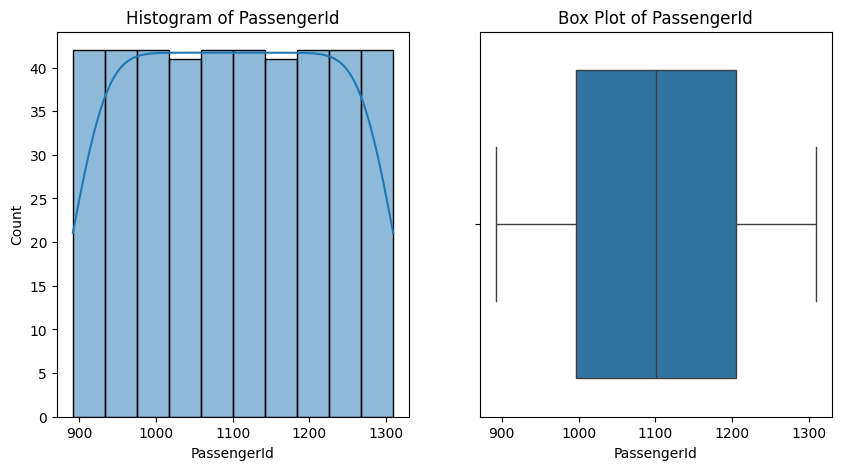

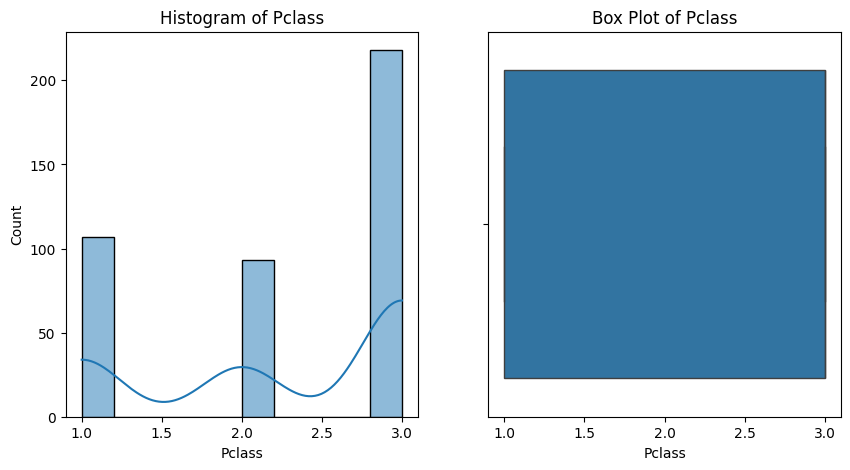

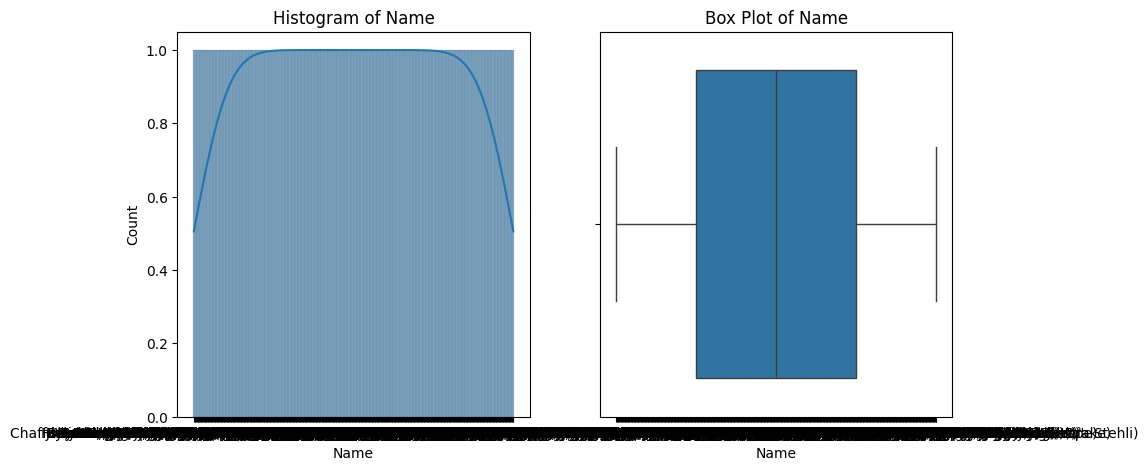

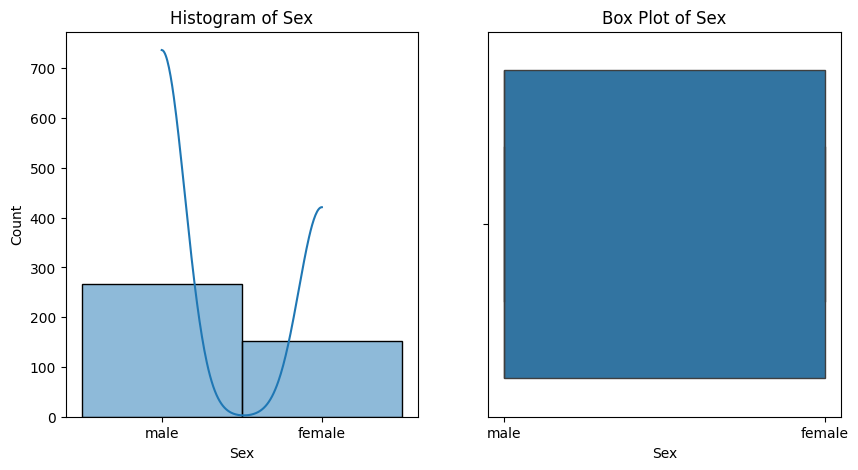

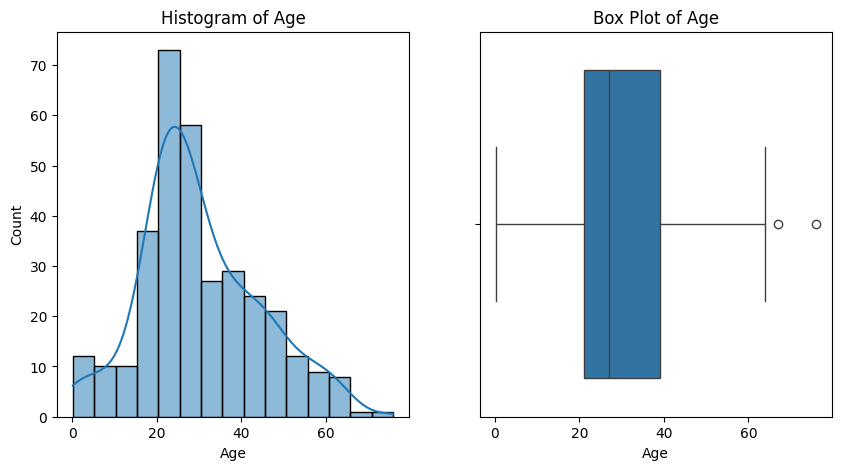

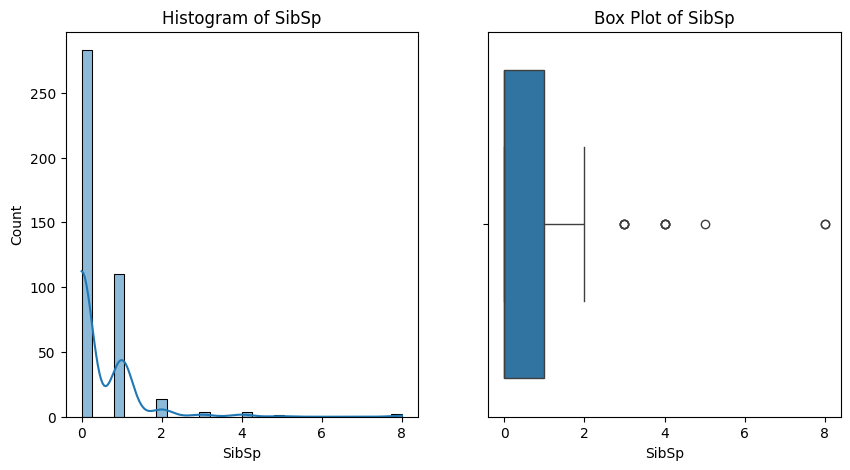

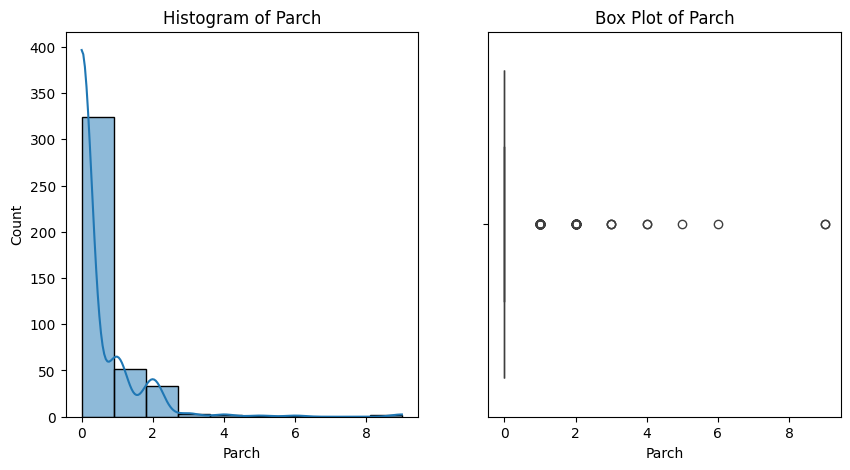

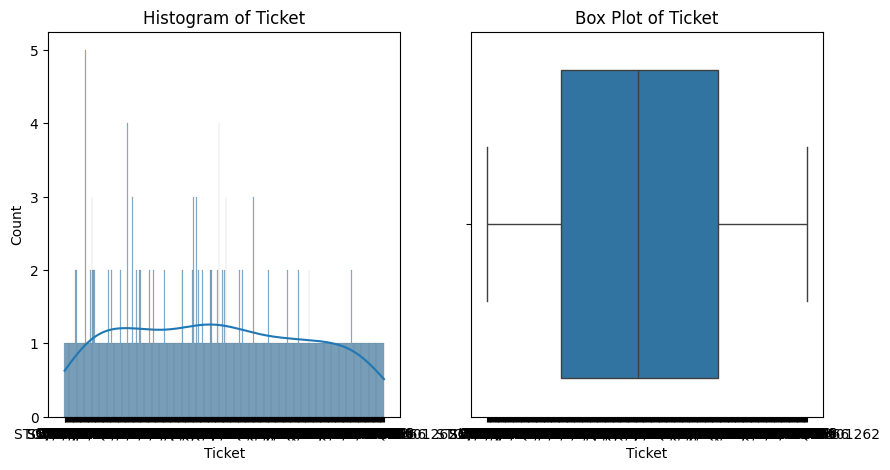

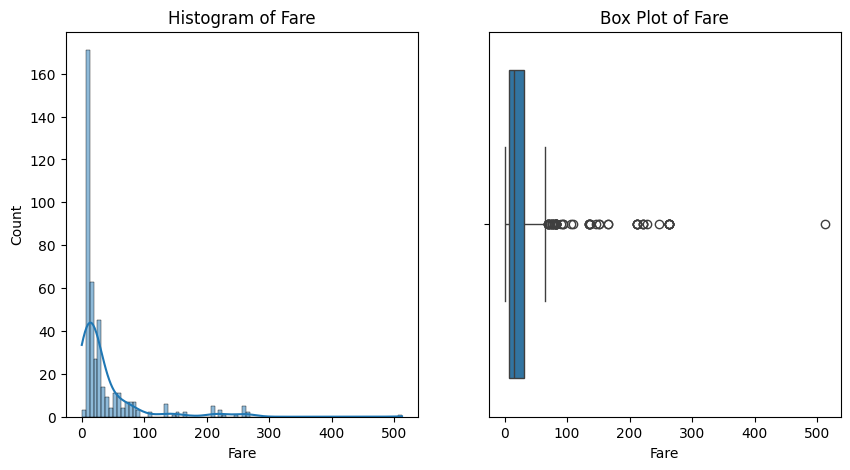

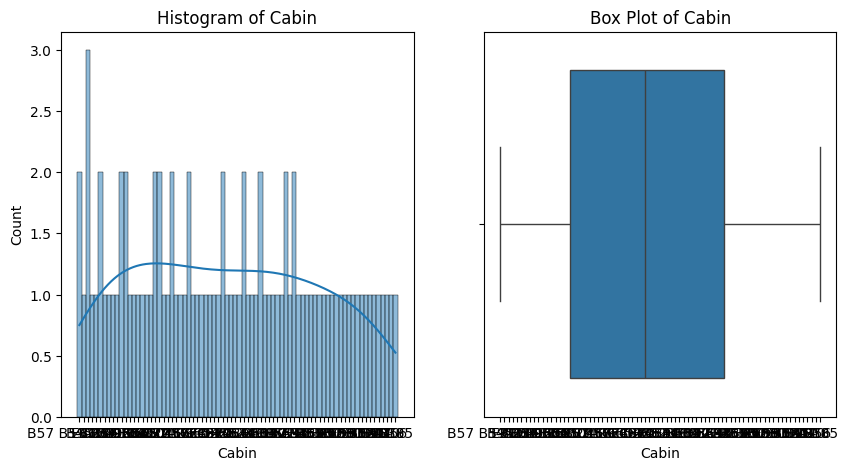

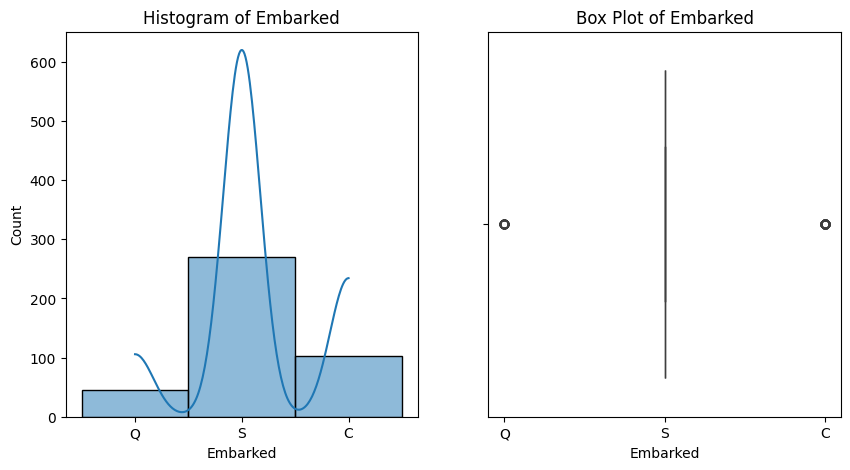

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

for column in df.columns:
  plt.figure(figsize=(10, 5))

  # Histogram
  plt.subplot(1, 2, 1)
  sns.histplot(data=df, x=column, kde=True)
  plt.title(f'Histogram of {column}')

  # Box plot
  plt.subplot(1, 2, 2)
  sns.boxplot(data=df, x=column)
  plt.title(f'Box Plot of {column}')

  plt.show()

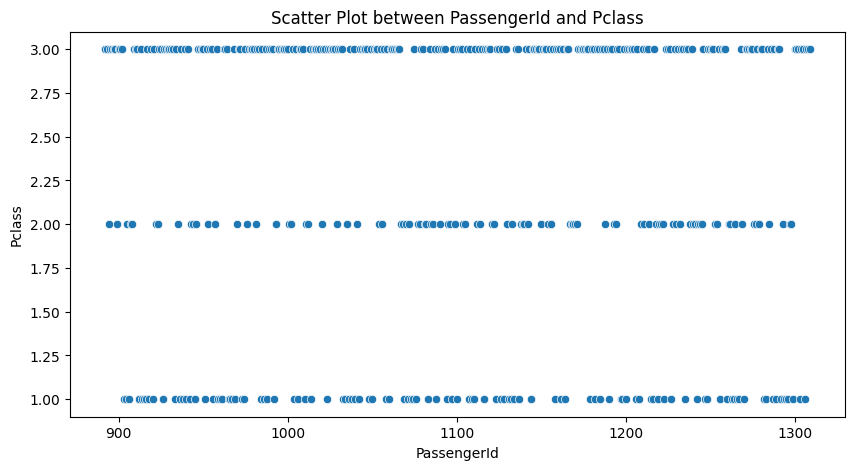

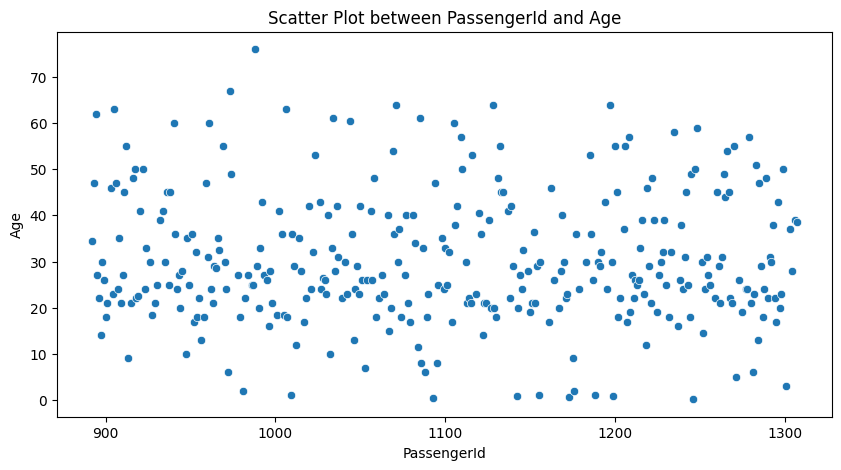

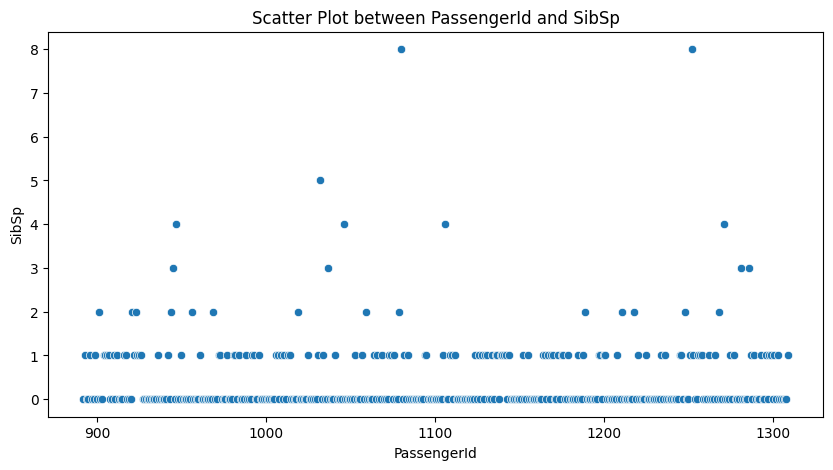

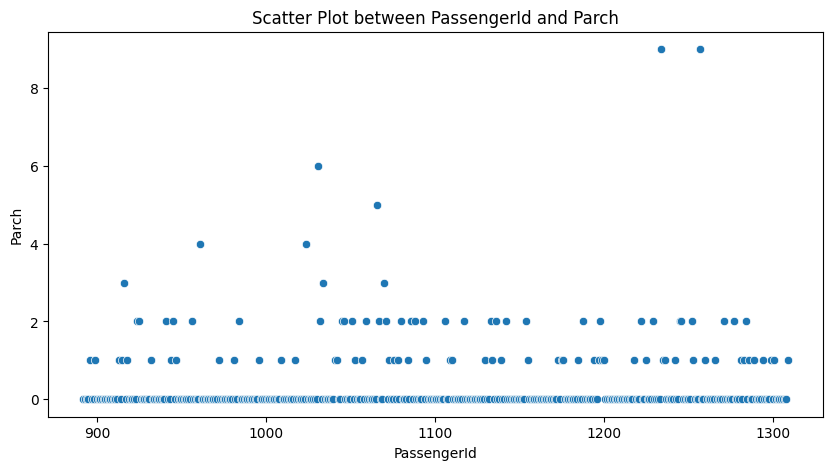

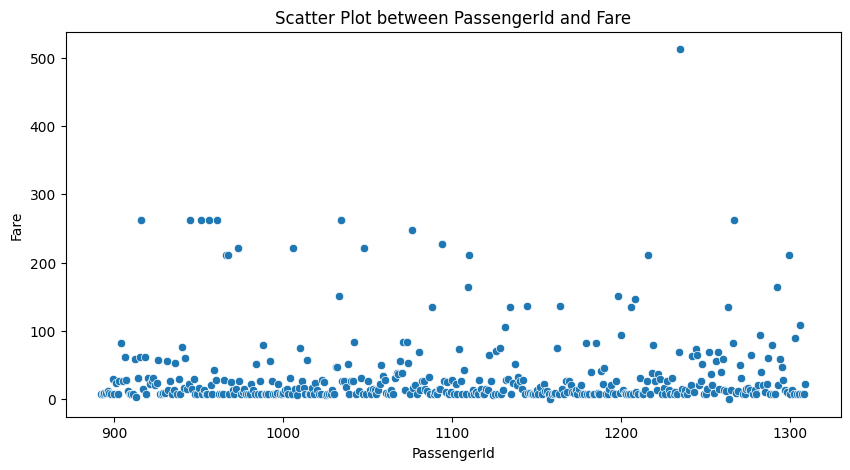

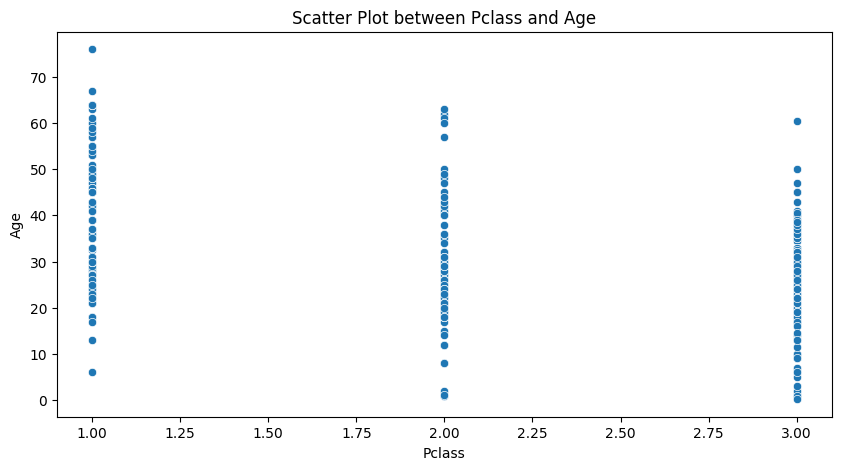

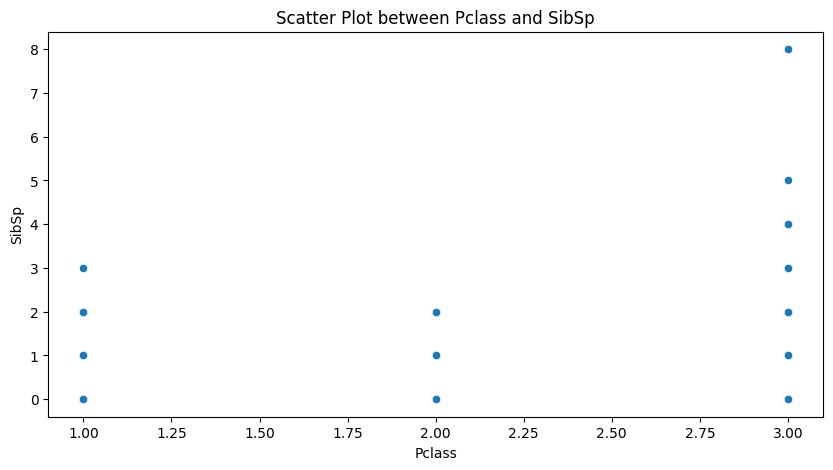

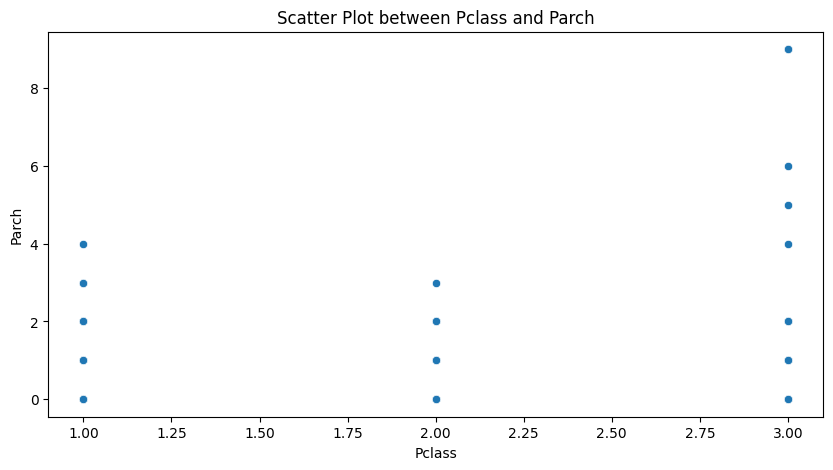

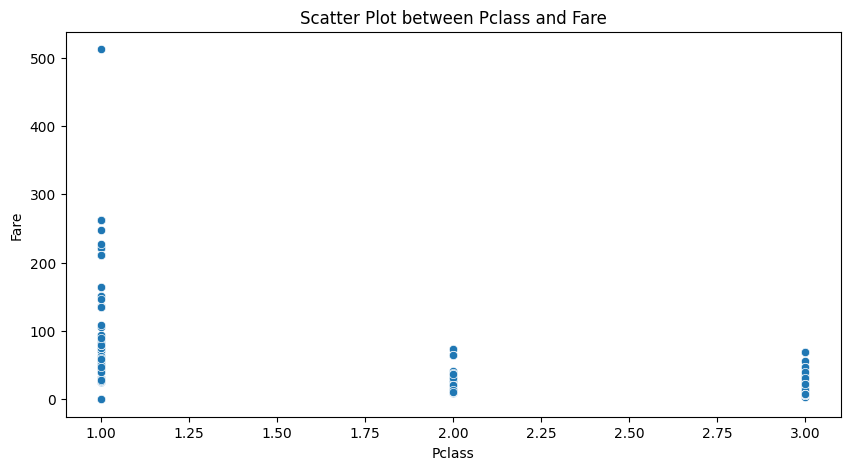

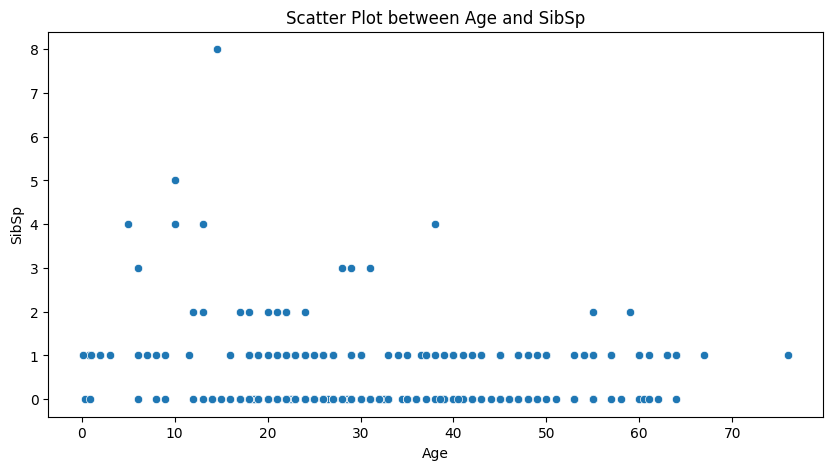

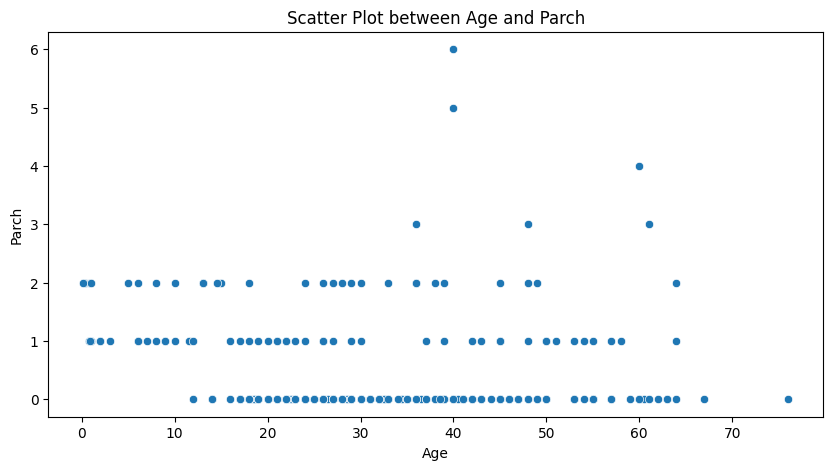

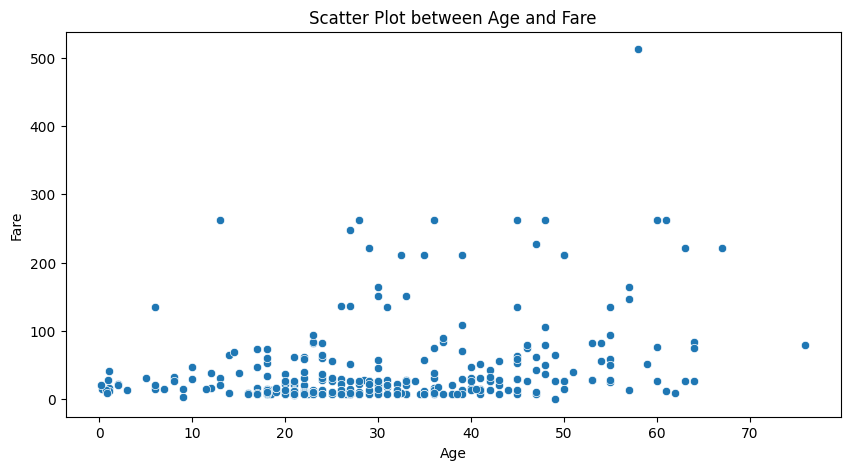

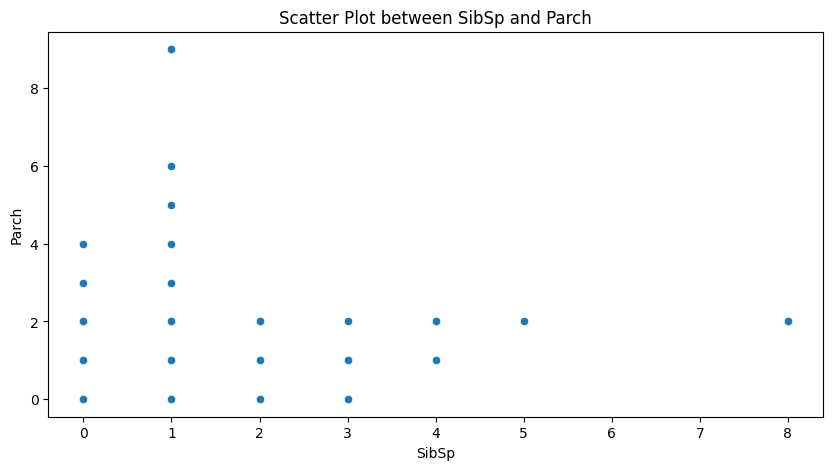

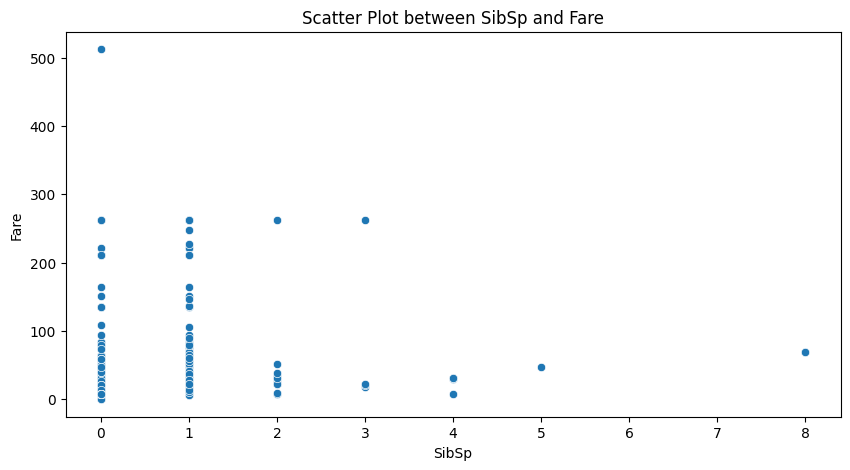

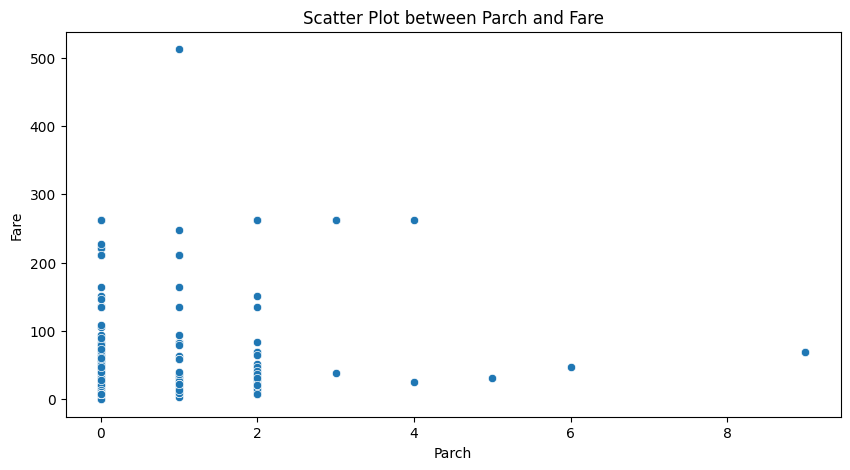

In [34]:
import matplotlib.pyplot as plt
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for i in range(len(numerical_columns)):
  for j in range(i + 1, len(numerical_columns)):
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=df, x=numerical_columns[i], y=numerical_columns[j])
    plt.title(f'Scatter Plot between {numerical_columns[i]} and {numerical_columns[j]}')
    plt.show()

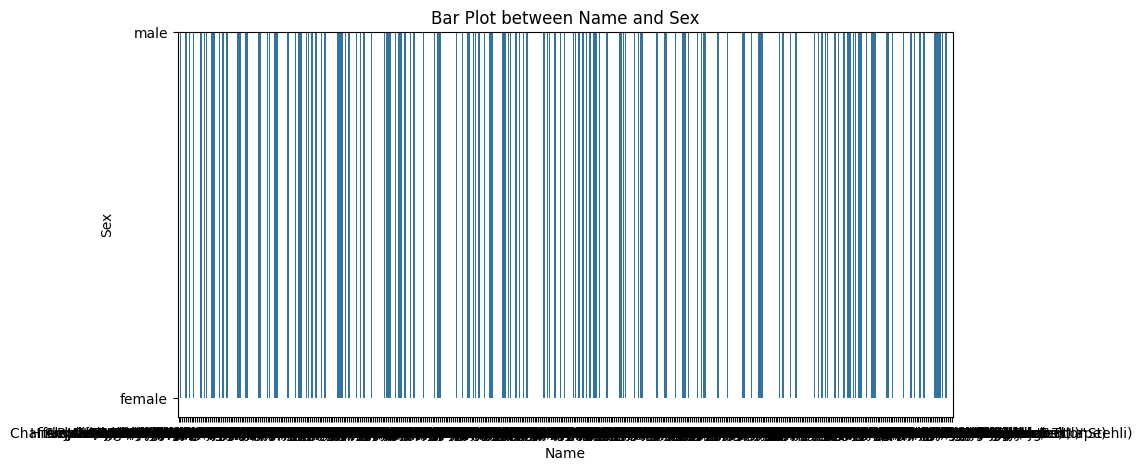

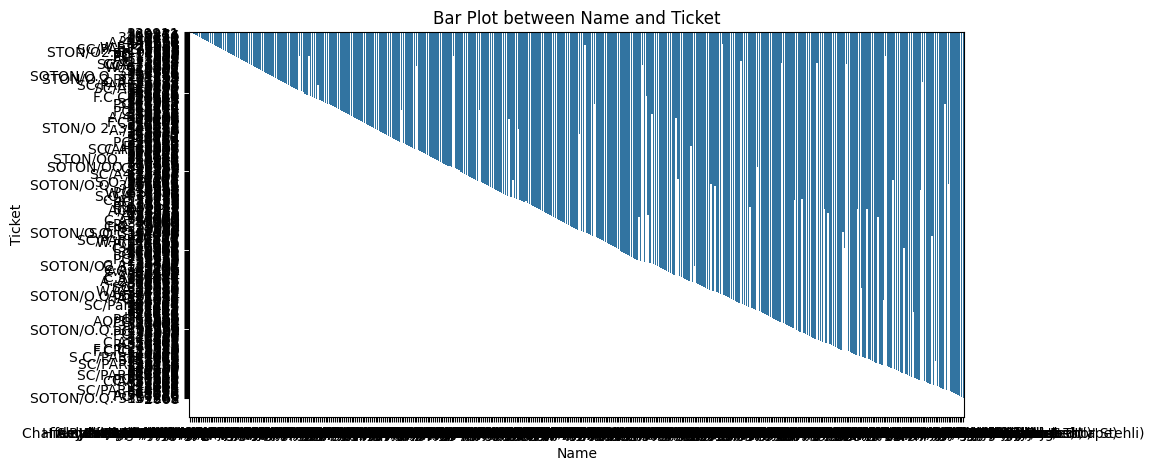

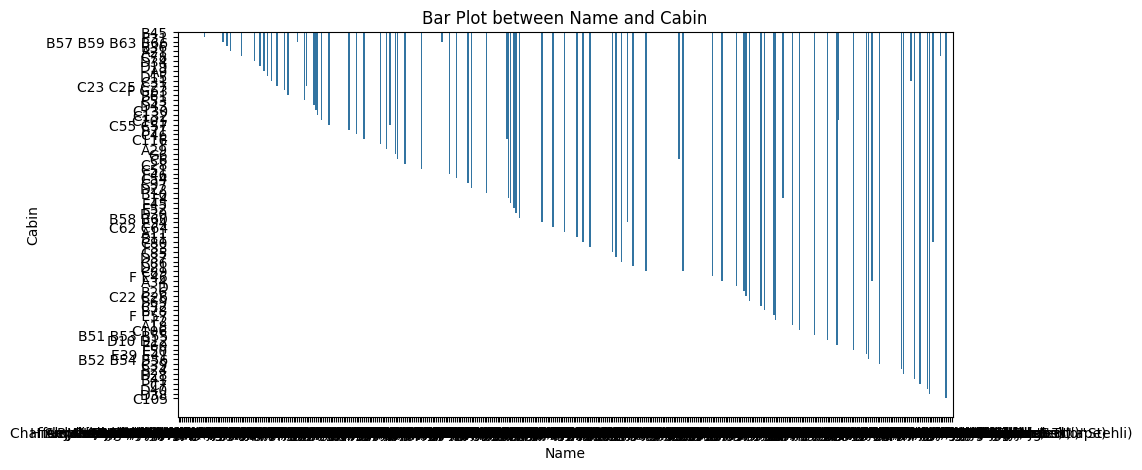

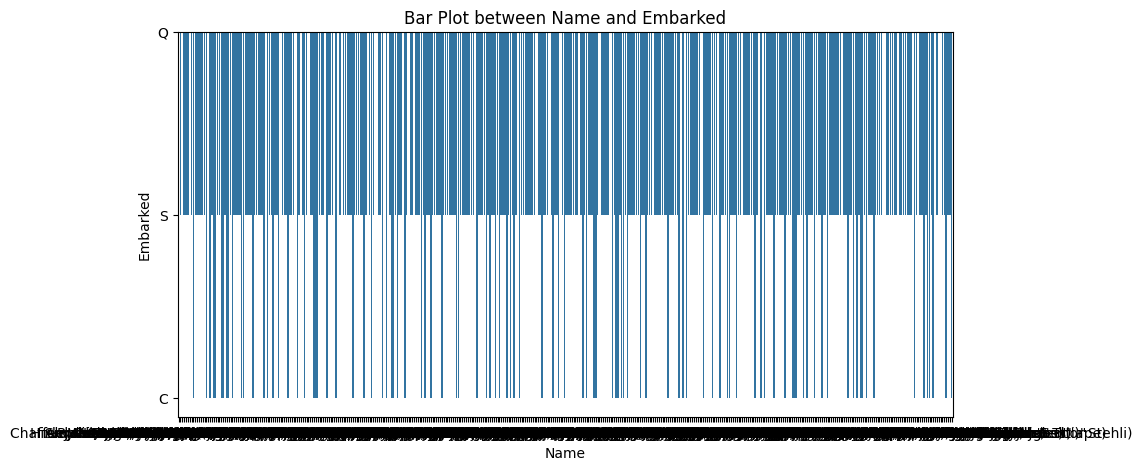

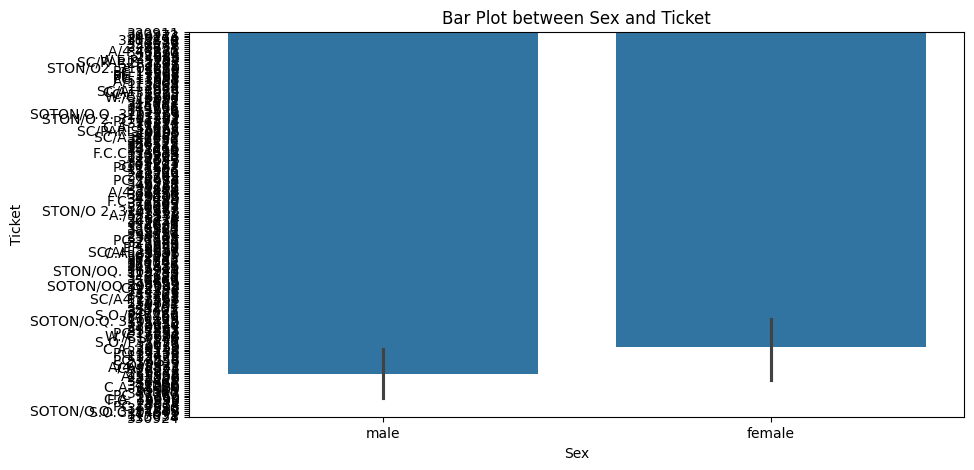

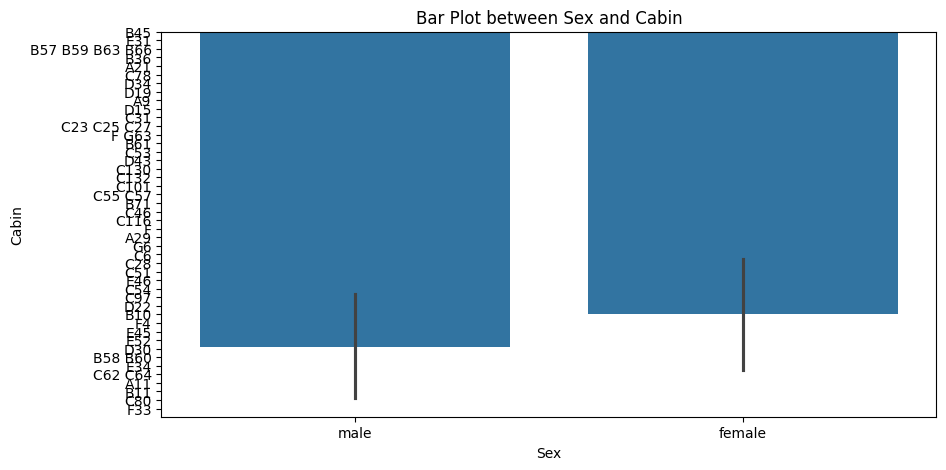

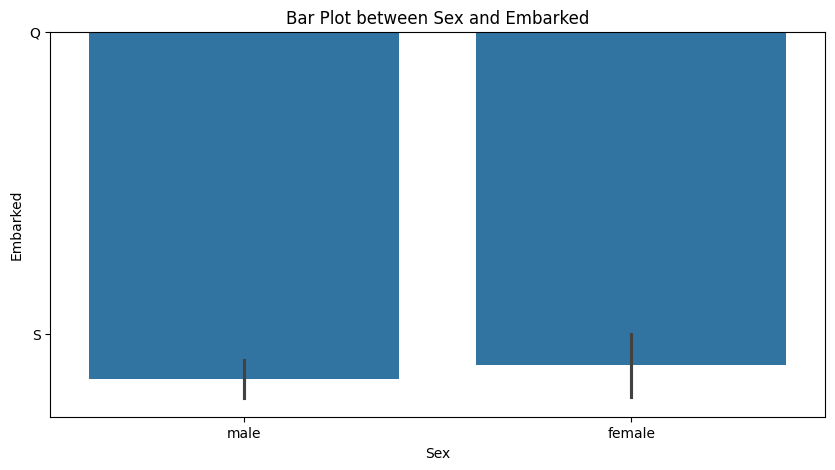

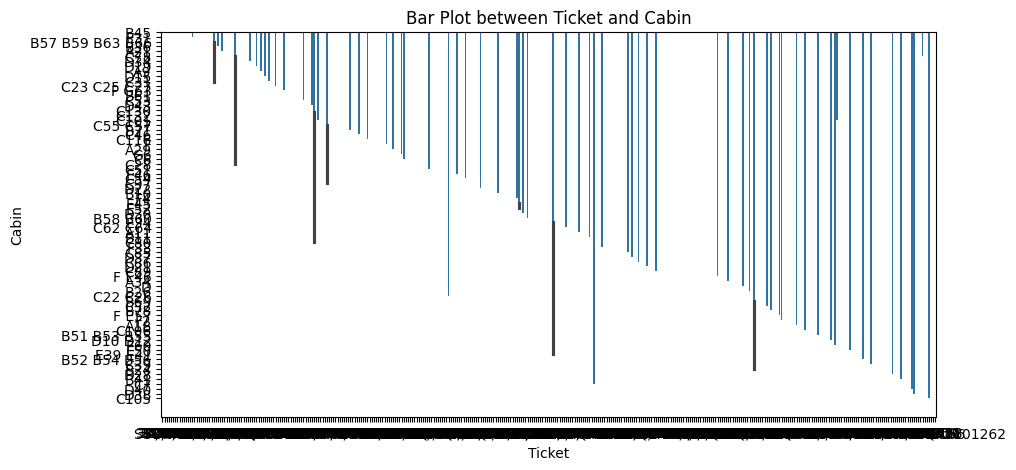

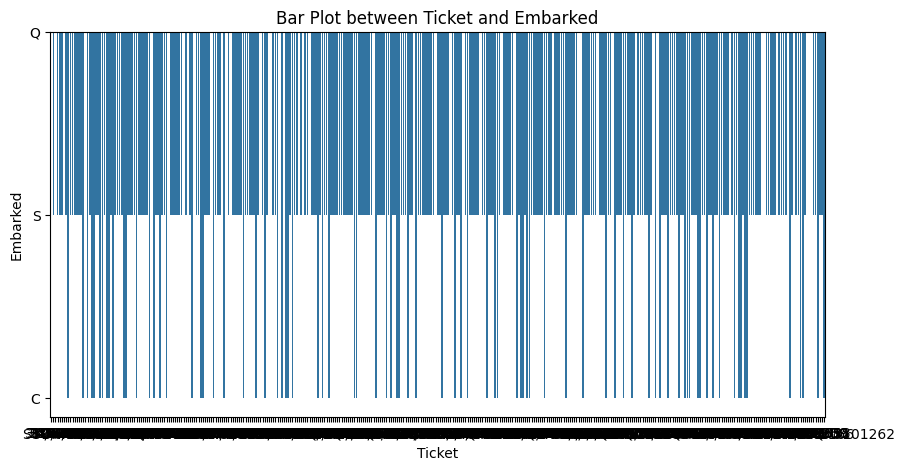

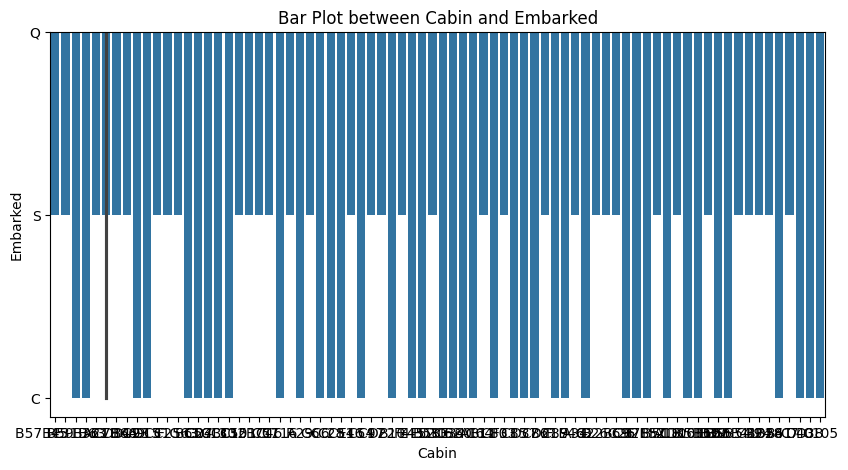

In [35]:
import matplotlib.pyplot as plt
categorical_columns = df.select_dtypes(include=['object']).columns

for i in range(len(categorical_columns)):
  for j in range(i + 1, len(categorical_columns)):
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df, x=categorical_columns[i], y=categorical_columns[j])
    plt.title(f'Bar Plot between {categorical_columns[i]} and {categorical_columns[j]}')
    plt.show()


In [36]:
# handling the missing values

# Fill missing values in numerical columns with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Fill missing values in categorical columns with the mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

In [37]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the categorical columns
for column in categorical_columns:
  # Fit the encoder to the data
  le.fit(df[column])

  # Transform the data
  df[column] = le.transform(df[column])
df.head()

PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0          892       3   206    1  34.5      0      0     152   7.8292     15   
1          893       3   403    0  47.0      1      0     221   7.0000     15   
2          894       2   269    1  62.0      0      0      73   9.6875     15   
3          895       3   408    1  27.0      0      0     147   8.6625     15   
4          896       3   178    0  22.0      1      1     138  12.2875     15   

   Embarked  
0         1  
1         2  
2         1  
3         2  
4         2

In [38]:
df.shape

(418, 11)

In [40]:
Y=df["Embarked"]
X=df.iloc[:,0:10]
X.head()

PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin
0          892       3   206    1  34.5      0      0     152   7.8292     15
1          893       3   403    0  47.0      1      0     221   7.0000     15
2          894       2   269    1  62.0      0      0      73   9.6875     15
3          895       3   408    1  27.0      0      0     147   8.6625     15
4          896       3   178    0  22.0      1      1     138  12.2875     15

In [41]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
SS_X=SS.fit_transform(X)
SS_X=pd.DataFrame(SS_X)
SS_X.columns=list(X)
SS_X.head()

PassengerId    Pclass      Name       Sex       Age     SibSp     Parch  \
0    -1.727912  0.873482 -0.020718  0.755929  0.386231 -0.499470 -0.400248   
1    -1.719625  0.873482  1.611889 -1.322876  1.371370  0.616992 -0.400248   
2    -1.711337 -0.315819  0.501385  0.755929  2.553537 -0.499470 -0.400248   
3    -1.703050  0.873482  1.653326  0.755929 -0.204852 -0.499470 -0.400248   
4    -1.694763  0.873482 -0.252764 -1.322876 -0.598908  0.616992  0.619896   

     Ticket      Fare    Cabin  
0 -0.269494 -0.497413 -0.35149  
1  0.372934 -0.512278 -0.35149  
2 -1.005027 -0.464100 -0.35149  
3 -0.316046 -0.482475 -0.35149  
4 -0.399841 -0.417492 -0.35149

In [42]:
#dividing the data into training and testing samples
import numpy as np
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30)

In [43]:
#LGBM
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
# Create a LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, max_features=0.7)

# Fit the model to the training data
lgb_clf.fit(X_train, Y_train)

# Predict the labels for the training data
Y_pred_train = lgb_clf.predict(X_train)

# Calculate the accuracy for the training data
accuracy_train = accuracy_score(Y_train, Y_pred_train)

# Predict the labels for the test data
Y_pred_test = lgb_clf.predict(X_test)

# Calculate the accuracy for the test data
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# Print the training and test accuracy
print(f"Training accuracy: {accuracy_train}")
print(f"Test accuracy: {accuracy_test}")

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 292, number of used features: 10
[LightGBM] [Info] Start training from score -1.372689
[LightGBM] [Info] Start training from score -2.380917
[LightGBM] [Info] Start training from score -0.424480
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

In [53]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
# Create a LightGBM classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, max_features=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    lgb_clf.fit(X_train,Y_train)
    Y_pred_train=lgb_clf.predict(X_train)
    Y_pred_test=lgb_clf.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(2))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(2))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000079 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 443
[LightGBM] [Info] Number of 

In [54]:
import pandas as pd
import numpy as np
table = pd.DataFrame({
    'Model': ['LGBMClassifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(2)],
    'Test Accuracy': [np.mean(test_accuracy).round(2)]
})
table

Model  Training Accuracy  Test Accuracy
0  LGBMClassifier                1.0           0.86

In [55]:
#XGBM
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
# Create a XGB classifier
xgb_clf = xgb.XGBClassifier(n_estimators=100,colsample_bytree=0.7)

# Fit the model to the training data
xgb_clf.fit(X_train, Y_train)

# Predict the labels for the training data
Y_pred_train = xgb_clf.predict(X_train)

# Calculate the accuracy for the training data
accuracy_train = accuracy_score(Y_train, Y_pred_train)

# Predict the labels for the test data
Y_pred_test = xgb_clf.predict(X_test)

# Calculate the accuracy for the test data
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# Print the training and test accuracy
print(f"Training accuracy: {accuracy_train}")
print(f"Test accuracy: {accuracy_test}")

Training accuracy: 1.0
Test accuracy: 0.8333333333333334


In [56]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import accuracy_score
xgb_clg = xgb.XGBClassifier(n_estimators=100,colsample_bytree=0.7)
training_accuracy=[]
test_accuracy=[]
for i in range(1,101):
    X_train,X_test,Y_train,Y_test=train_test_split(SS_X,Y,test_size=0.30,random_state=i)
    xgb_clg.fit(X_train,Y_train)
    Y_pred_train=xgb_clg.predict(X_train)
    Y_pred_test=xgb_clg.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

print("cross validation training accuracy score=",np.mean(training_accuracy).round(2))
print("cross validation test accuracy score=",np.mean(test_accuracy).round(2))

cross validation training accuracy score= 1.0
cross validation test accuracy score= 0.87


In [58]:
import pandas as pd
import numpy as np
table1 = pd.DataFrame({
    'Model': ['XGBClassifier'],
    'Training Accuracy': [np.mean(training_accuracy).round(2)],
    'Test Accuracy': [np.mean(test_accuracy).round(2)]
})
table = pd.concat([table, table1])
table


Model  Training Accuracy  Test Accuracy
0  LGBMClassifier                1.0           0.86
0   XGBClassifier                1.0           0.87